- <b>DOMAIN</b>: Automobile 

- <b>CONTEXT </b>: The  data  concerns  city-cycle  fuel  consumption  in  miles  per  gallon,  to  be  predicted  in  terms  of  3 multivalued discrete and 5 continuous attribute.

- <b> PROJECT  OBJECTIVE </b>: Goal  is  to  cluster  the  data  and  treat  them  as  individual  datasets  to  train  Regression models to predict ‘mpg’

# Import and warehouse data: [ Score: 3 points ]
- Import all the given datasets and explore shape and size. 
- Merge all datasets onto one and explore final shape and size.
- Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.
- Import the data from above steps into python.

In [550]:
# Supress Warnings
import warnings

# Import numpy

import numpy as np

#Import Pandas

import pandas as pd

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

import scipy.stats as stats

# suppress display of warnings
warnings.filterwarnings('ignore')

import seaborn as sns

import plotly.express as px

from scipy.stats import zscore

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

from sklearn import metrics

from sklearn.model_selection import train_test_split


# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

## Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

##Upsampling Technique
from sklearn.utils import resample


# Import all the given datasets and explore shape and size.

In [551]:
df_car_attributes = pd.read_json('C:\\Users\\Sasikumar Bala\\JupyterWorkspace\\UnsupervisedLearning\\Assignment\\Car-Attributes.json')

In [552]:
df_car_names = pd.read_csv('C:\\Users\\Sasikumar Bala\\JupyterWorkspace\\UnsupervisedLearning\\Assignment\\Car+name.csv')

In [553]:
print('There are ',df_car_attributes.shape[0],' rows and ',df_car_attributes.shape[1],
      'columns from the Car-Attributes.json file')

There are  398  rows and  8 columns from the Car-Attributes.json file


In [554]:
print('There are ',df_car_names.shape[0],' rows and ',df_car_names.shape[1],
      'columns from the Car+name.csv file')

There are  398  rows and  1 columns from the Car+name.csv file


# Merge all datasets onto one and explore final shape and size.

In [555]:
# As there are same number of rows from df_car_attributes and df_car_names, We can merge them for further analysis
df_car = pd.concat([df_car_attributes,df_car_names],axis =1)

In [556]:
df_car.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
142,26.0,4,79.0,67,1963,15.5,74,2,volkswagen dasher
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
123,20.0,6,156.0,122,2807,13.5,73,3,toyota mark ii
208,13.0,8,318.0,150,3940,13.2,76,1,plymouth volare premier v8
48,18.0,6,250.0,88,3139,14.5,71,1,ford mustang
150,26.0,4,108.0,93,2391,15.5,74,3,subaru
355,33.7,4,107.0,75,2210,14.4,81,3,honda prelude
229,16.0,8,400.0,180,4220,11.1,77,1,pontiac grand prix lj
320,37.0,4,119.0,92,2434,15.0,80,3,datsun 510 hatchback
60,20.0,4,140.0,90,2408,19.5,72,1,chevrolet vega


In [557]:
print('After merging the 2 dataset We have ',df_car.shape[0],' rows and ',df_car.shape[1],' columns')

After merging the 2 dataset We have  398  rows and  9  columns


# Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.

In [558]:
df_car.to_csv('C:\\Users\\Sasikumar Bala\\JupyterWorkspace\\UnsupervisedLearning\\Assignment\\merged_car.csv',
              index=False)

In [559]:
df_car.to_json('C:\\Users\\Sasikumar Bala\\JupyterWorkspace\\UnsupervisedLearning\\Assignment\\merged_car.json',
              orient ='records')

# Import the data from above steps into python.

In [560]:
df_final_car = pd.read_json('C:\\Users\\Sasikumar Bala\\JupyterWorkspace\\UnsupervisedLearning\\Assignment\\merged_car.json')

In [561]:
print('There are ',df_final_car.shape[0],' rows and ',df_final_car.shape[1],
      'columns from the Exported CSV/JSON file')

There are  398  rows and  9 columns from the Exported CSV/JSON file


In [562]:
df_final_car.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
102,26.0,4,97.0,46,1950,21.0,73,2,volkswagen super beetle
43,13.0,8,400.0,170,4746,12.0,71,1,ford country squire (sw)
22,25.0,4,104.0,95,2375,17.5,70,2,saab 99e
226,20.5,6,231.0,105,3425,16.9,77,1,buick skylark
386,25.0,6,181.0,110,2945,16.4,82,1,buick century limited
318,29.8,4,134.0,90,2711,15.5,80,3,toyota corona liftback
31,25.0,4,113.0,95,2228,14.0,71,3,toyota corona
248,36.1,4,91.0,60,1800,16.4,78,3,honda civic cvcc
214,13.0,8,302.0,130,3870,15.0,76,1,ford f108
363,22.4,6,231.0,110,3415,15.8,81,1,buick century


# Observations after merging and loading the Dataset.



| Attribute Name | Attribute Type| Attribute Description |
| --- | --- | --- |
|mpg | continuous | Miles Per Gallon|
| cylinders |   multi-valued discrete | N.o of Cylinders in the Engine|
| displacement | continuous  | Displacement by the Engine |
| horsepower  | continuous | Horse power exhibit by the Engine |
| weight | continuous | Weight of the car |
| acceleration | continuous | Max Speed by the car|
| model Year | multi-valued discrete | Make of the car |
| Origin | multi-valued discrete | Manufactured place |
| car name | String (unique for each instance) | Name of the Car |

# Data cleansing: [ Score: 3 points ]

# Missing/incorrect value treatment

In [563]:
df_final_car.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_name     object
dtype: object

In [564]:
df_final_car.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [565]:
# Checking the Dataset has null data points

if(df_final_car.isnull().sum().any()):
    print('The dataset contains null data points')
else:
    print('There are no null data points')

There are no null data points


In [566]:
## Checking for any Negative numbers or special characters in the dataset as 
## we are seeing the hp attribute as a Object

def hasBadDataPoints(df_final_car):
    isBadData = False;
    isDigitColumn= False;
    
    for idx in df_final_car.columns:
        if(df_final_car[idx].dtype == 'int64'):
            for i in  range(1,len(df_final_car[idx])):
                if(df_final_car[idx][i].astype(str).isdigit() == False):
                    isBadData = True
                    print('Column Name',idx,' Row Id: ', i,' has a bad data point as -',df_final_car[idx][i])

        if(df_final_car[idx].dtype == 'float64'):
            for i in  range(1,len(df_final_car[idx])):
                if(df_final_car[idx][i].astype(str).replace('.','',1).isdigit() == False):
                    print(' Row Id: ', i,' has a bad data point as -',df_final_car[idx][i])
                    isBadData = True
        
        if(df_final_car[idx].dtype == 'object'):
            for i in range(1,len(df_final_car[idx])):
                if(str(df_final_car[idx][i]).isdigit() == True):
                    isDigitColumn =True
                    
                if(isDigitColumn and str(df_final_car[idx][i]).isdigit() == False):
                    isBadData =True
                    print('Column -',idx,' Row Id: ', i,' has a bad data point as -',df_final_car[idx][i])
            
        
        isDigitColumn =False
        
    return isBadData

In [567]:
if(hasBadDataPoints(df_final_car)):
    print('Data set has above Bad or Negative Data points.Please correct them')
else:
    print('There are no Bad or negative Data Points')

Column - hp  Row Id:  32  has a bad data point as - ?
Column - hp  Row Id:  126  has a bad data point as - ?
Column - hp  Row Id:  330  has a bad data point as - ?
Column - hp  Row Id:  336  has a bad data point as - ?
Column - hp  Row Id:  354  has a bad data point as - ?
Column - hp  Row Id:  374  has a bad data point as - ?
Data set has above Bad or Negative Data points.Please correct them


<font color=darkblue>

# Observations:
   - We are seeing the hp attribute as Object eventhough it is a number attribute.
   - On further analysis, We have found the hp attribute has some bad Data Points, Which is affecting the 
      Mean,STD.
   - you can see the above bad data points and  the exact rows which have ?

# Drop attribute/s if required using relevant functional knowledge

In [568]:
# clustering doesn't requires individual car names. 
# Even you can observe the car names that has repeated maximum number of times is ford pinto for 6 times.

df_final_car['car_name'].value_counts()

ford pinto                6
amc matador               5
toyota corolla            5
ford maverick             5
toyota corona             4
                         ..
plymouth 'cuda 340        1
chevy s-10                1
plymouth volare custom    1
ford ranger               1
volkswagen type 3         1
Name: car_name, Length: 305, dtype: int64

In [569]:
# Hence dropping the Car_name attribute

mpg_df = df_final_car.drop(columns='car_name',axis=1)

In [570]:
mpg_df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
152,19.0,6,225.0,95,3264,16.0,75,1
64,15.0,8,318.0,150,4135,13.5,72,1
277,16.2,6,163.0,133,3410,15.8,78,2
330,40.9,4,85.0,?,1835,17.3,80,2
96,13.0,8,360.0,175,3821,11.0,73,1
300,23.9,8,260.0,90,3420,22.2,79,1
308,33.5,4,151.0,90,2556,13.2,79,1
120,19.0,4,121.0,112,2868,15.5,73,2
388,26.0,4,156.0,92,2585,14.5,82,1
66,17.0,8,304.0,150,3672,11.5,72,1


# Perform another kind of corrections/treatment on the data.

In [571]:
# Replacing the Special Character with na and filling the na with Median value of hp
mpg_df = mpg_df.replace('?', np.nan)

mpg_car_df = mpg_df.apply(lambda x : x.fillna(x.median()),axis =0)

In [572]:
mpg_car_df.dtypes

mpg       float64
cyl         int64
disp      float64
hp        float64
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

<font color=darkblue>

# Observations:
   - The Special Characters in the hp attribute has been replaced with median value.
   - The HP attribute type has been converted as float64 from object.

# 3.Data analysis & visualisation: [ Score: 4 points ]

In [573]:
mpg_car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [574]:
# Prints the value below which 25% of the data lies

print("Data_quantile(25%):\n",mpg_car_df.quantile(q=0.25))

Data_quantile(25%):
 mpg         17.500
cyl          4.000
disp       104.250
hp          76.000
wt        2223.750
acc         13.825
yr          73.000
origin       1.000
Name: 0.25, dtype: float64


In [575]:
# Prints the value below which 50% of the data lies

print("Data_quantile(50%):\n",mpg_car_df.quantile(q=0.50))

Data_quantile(50%):
 mpg         23.0
cyl          4.0
disp       148.5
hp          93.5
wt        2803.5
acc         15.5
yr          76.0
origin       1.0
Name: 0.5, dtype: float64


In [576]:
# Prints the value below which 75% of the data lies

print("Data_quantile(75%):\n",mpg_car_df.quantile(q=0.75))

Data_quantile(75%):
 mpg         29.000
cyl          8.000
disp       262.000
hp         125.000
wt        3608.000
acc         17.175
yr          79.000
origin       2.000
Name: 0.75, dtype: float64


In [577]:
mpg_car_df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

<font color=darkblue>

# Observations:
   - Not all the attributes are on the same scale. Scaling will be helpful for further analysis.
   - Low MPG is about 9 and Maximum MPG is about 46.6.
   - Low number of cylinders in car is 3 and high number of cylinders in the car is 8.
   - Car with Low engine wt is 1613.0 and car with high engine weight is 5140.0.
   - car with Manufacturing Year starts from 1970 to max year 1982.
   - car with minimum acceleration has 8.0 and maximum acceleration is 24.8.
   - From the Origin attribute its clear there are only 3 values with Origin 1, Origin 2 and Origin 3

## Univariate Analysis
## Measure of skewness of  ‘MPG’

In [578]:
mpg_mode =mpg_car_df['mpg'].mode()
mpg_median = mpg_car_df['mpg'].median()
mpg_mean = mpg_car_df['mpg'].mean()
print('Mode :',mpg_mode)
print('Median :',mpg_median)
print('Mean:',mpg_mean)
print ('Skewness on MPG :',mpg_car_df.skew()['mpg'])

if(mpg_mean > mpg_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0    13.0
dtype: float64
Median : 23.0
Mean: 23.514572864321615
Skewness on MPG : 0.45706634399491913
Then the distribution is positively skewed.


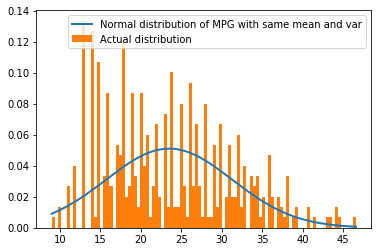

In [579]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(mpg_car_df['mpg'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of MPG with same mean and var")
plt.hist(h,bins = 100,density=True,label="Actual distribution")      
plt.legend()
plt.show()

In [580]:
IQR_MPG = mpg_car_df["mpg"].quantile(0.75) - mpg_car_df["mpg"].quantile(0.25)

print('IQR_MPG -',IQR_MPG)

high_Wiskers_outlier = mpg_car_df["mpg"].quantile(0.75) + 1.5*IQR_MPG
print('Higher outliers >',high_Wiskers_outlier)

low_Wiskers_outlier = mpg_car_df["mpg"].quantile(0.25)  - 1.5*IQR_MPG
print('Lower outliers <',low_Wiskers_outlier)

IQR_MPG - 11.5
Higher outliers > 46.25
Lower outliers < 0.25


Text(0.8, 0.25, 'Lower Outliers')

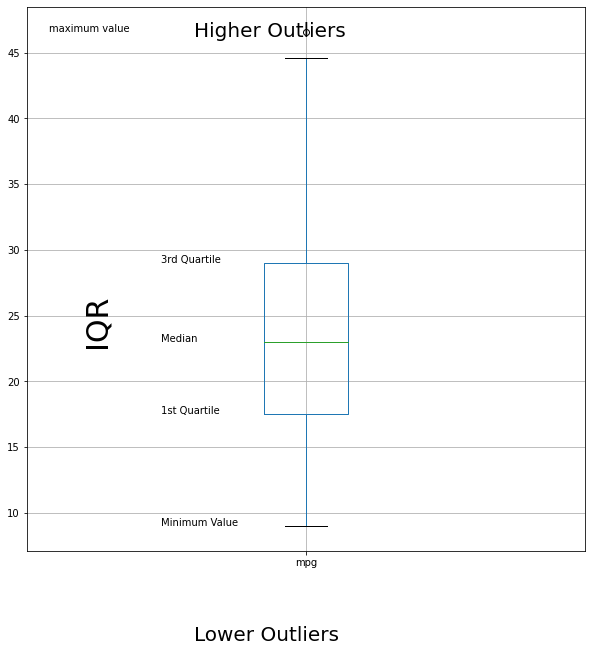

In [581]:
# Box Plot to show the outliers
mpg_car_df.boxplot(column="mpg",return_type='axes',figsize=(10,10))
plt.text(x=0.74, y=29, s="3rd Quartile")
plt.text(x=0.74, y=23,  s="Median")
plt.text(x=0.74, y=17.5,  s="1st Quartile")
plt.text(x=0.74, y=9,  s="Minimum Value")
plt.text(x=0.54, y=46.6,  s="maximum value")
plt.text(x=0.80, y=46.25, s="Higher Outliers",size=20)
plt.text(x=0.60, y=23, s="IQR", rotation=90, size=30)
plt.text(x=0.80, y=0.25, s="Lower Outliers",size=20)

<font color=darkblue>

## Observations:
   - Distribution on MPG is positively skewed.
   - Seeing few outliers which may affect the Clustering.

## Measure of skewness of  ‘Cylinder’

<AxesSubplot:xlabel='cyl', ylabel='count'>

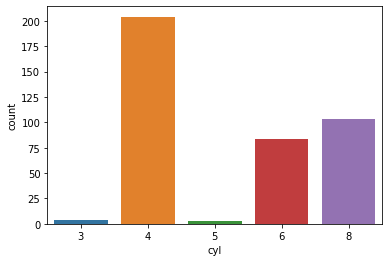

In [582]:
sns.countplot(x="cyl", data=mpg_car_df)

<font color=darkblue>

## Observations:
   - As Cylinders as ordinal attributes, there are 5 types of cylinders as 3,4,5,6,8
   - 4 Cylinder engines are highly used Whereas 6 and 8 cylinders are compartively less in number.
   - 6 and 8 Cylinder engines are mostly of sports car type.

## Measure of skewness of  ‘Displacement’

In [583]:
disp_mode =mpg_car_df['disp'].mode()
disp_median = mpg_car_df['disp'].median()
disp_mean = mpg_car_df['disp'].mean()
print('Mode :',disp_mode)
print('Median :',disp_median)
print('Mean:',disp_mean)
print ('Skewness on DISP :',mpg_car_df.skew()['disp'])

if(disp_mean > disp_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0    97.0
dtype: float64
Median : 148.5
Mean: 193.42587939698493
Skewness on DISP : 0.7196451643005952
Then the distribution is positively skewed.


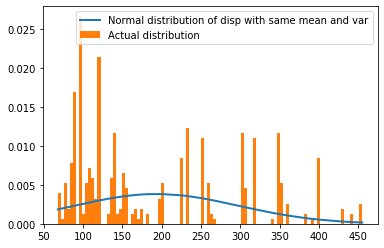

In [584]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(mpg_car_df['disp'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of disp with same mean and var")
plt.hist(h,bins = 100,density=True,label="Actual distribution")      
plt.legend()
plt.show()

In [585]:
IQR_Disp = mpg_car_df["disp"].quantile(0.75) - mpg_car_df["disp"].quantile(0.25)

print('IQR_Disp -',IQR_Disp)

high_Wiskers_outlier = mpg_car_df["disp"].quantile(0.75) + 1.5*IQR_Disp
print('Higher outliers >',high_Wiskers_outlier)

low_Wiskers_outlier = mpg_car_df["disp"].quantile(0.25)  - 1.5*IQR_Disp
print('Lower outliers <',low_Wiskers_outlier)

IQR_Disp - 157.75
Higher outliers > 498.625
Lower outliers < -132.375


Text(0.8, -132.375, 'Lower Outliers')

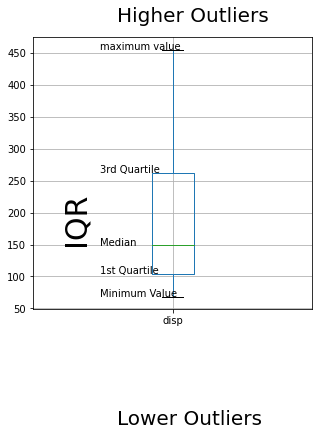

In [586]:
# Box Plot to show the outliers
mpg_car_df.boxplot(column="disp",return_type='axes',figsize=(5,5))
plt.text(x=0.74, y=262, s="3rd Quartile")
plt.text(x=0.74, y=148.5,  s="Median")
plt.text(x=0.74, y=104.25,  s="1st Quartile")
plt.text(x=0.74, y=68,  s="Minimum Value")
plt.text(x=0.74, y=455,  s="maximum value")
plt.text(x=0.80, y=498.625, s="Higher Outliers",size=20)
plt.text(x=0.60, y=157.75, s="IQR", rotation=90, size=30)
plt.text(x=0.80, y=-132.375, s="Lower Outliers",size=20)

<font color=darkblue>

## Observations:
 - Displacement looks to be multi modal and positively Skewed distribution.
 - There are no Outliers.

## Measure of skewness of  ‘HP’

In [587]:
hp_mode =mpg_car_df['hp'].mode()
hp_median = mpg_car_df['hp'].median()
hp_mean = mpg_car_df['hp'].mean()
print('Mode :',hp_mode)
print('Median :',hp_median)
print('Mean:',hp_mean)
print ('Skewness on HP :',mpg_car_df.skew()['hp'])

if(hp_mean > hp_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0    150.0
dtype: float64
Median : 93.5
Mean: 104.30402010050251
Skewness on HP : 1.1062242930872614
Then the distribution is positively skewed.


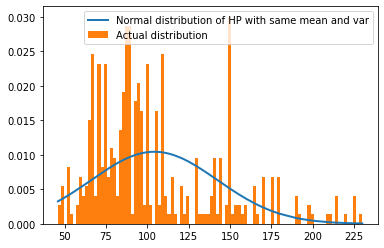

In [588]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(mpg_car_df['hp'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of HP with same mean and var")
plt.hist(h,bins = 100,density=True,label="Actual distribution")      
plt.legend()
plt.show()

In [589]:
IQR_HP = mpg_car_df["hp"].quantile(0.75) - mpg_car_df["hp"].quantile(0.25)

print('IQR_HP -',IQR_HP)

high_Wiskers_outlier = mpg_car_df["hp"].quantile(0.75) + 1.5*IQR_HP
print('Higher outliers >',high_Wiskers_outlier)

low_Wiskers_outlier = mpg_car_df["hp"].quantile(0.25)  - 1.5*IQR_HP
print('Lower outliers <',low_Wiskers_outlier)

IQR_HP - 49.0
Higher outliers > 198.5
Lower outliers < 2.5


Text(0.8, 2.5, 'Lower Outliers')

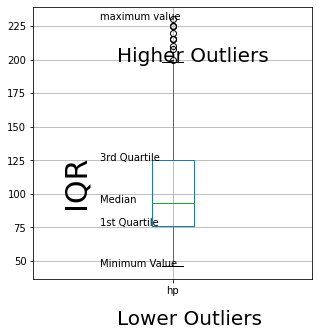

In [590]:
# Box Plot to show the outliers
mpg_car_df.boxplot(column="hp",return_type='axes',figsize=(5,5))
plt.text(x=0.74, y=125, s="3rd Quartile")
plt.text(x=0.74, y=93.5,  s="Median")
plt.text(x=0.74, y=76,  s="1st Quartile")
plt.text(x=0.74, y=46,  s="Minimum Value")
plt.text(x=0.74, y=230,  s="maximum value")
plt.text(x=0.80, y=198.5, s="Higher Outliers",size=20)
plt.text(x=0.60, y=93.5, s="IQR", rotation=90, size=30)
plt.text(x=0.80, y=2.5, s="Lower Outliers",size=20)

<font color=darkblue>

## Observations:
 - Hp looks to be multi modal and positively Skewed distribution.
 - There are Outliers which may affect the clustering process.

## Measure of skewness of  ‘WT’

In [591]:
wt_mode =mpg_car_df['wt'].mode()
wt_median = mpg_car_df['wt'].median()
wt_mean = mpg_car_df['wt'].mean()
print('Mode :',wt_mode)
print('Median :',wt_median)
print('Mean:',wt_mean)
print ('Skewness on WT :',mpg_car_df.skew()['wt'])

if(wt_mean > wt_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0    1985
1    2130
dtype: int64
Median : 2803.5
Mean: 2970.424623115578
Skewness on WT : 0.5310625125994629
Then the distribution is positively skewed.


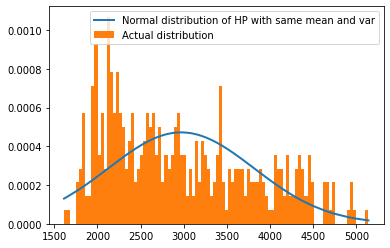

In [592]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(mpg_car_df['wt'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of HP with same mean and var")
plt.hist(h,bins = 100,density=True,label="Actual distribution")      
plt.legend()
plt.show()

In [593]:
IQR_WT = mpg_car_df["wt"].quantile(0.75) - mpg_car_df["wt"].quantile(0.25)

print('IQR_WT -',IQR_WT)

high_Wiskers_outlier = mpg_car_df["wt"].quantile(0.75) + 1.5*IQR_WT
print('Higher outliers >',high_Wiskers_outlier)

low_Wiskers_outlier = mpg_car_df["wt"].quantile(0.25)  - 1.5*IQR_WT
print('Lower outliers <',low_Wiskers_outlier)

IQR_WT - 1384.25
Higher outliers > 5684.375
Lower outliers < 147.375


Text(0.8, 147.375, 'Lower Outliers')

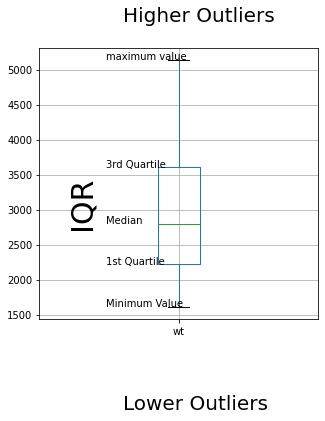

In [594]:
# Box Plot to show the outliers
mpg_car_df.boxplot(column="wt",return_type='axes',figsize=(5,5))
plt.text(x=0.74, y=3608, s="3rd Quartile")
plt.text(x=0.74, y=2803.5,  s="Median")
plt.text(x=0.74, y=2223.75,  s="1st Quartile")
plt.text(x=0.74, y=1613,  s="Minimum Value")
plt.text(x=0.74, y=5140,  s="maximum value")
plt.text(x=0.80, y=5684.375, s="Higher Outliers",size=20)
plt.text(x=0.60, y=2800, s="IQR", rotation=90, size=30)
plt.text(x=0.80, y=147.375, s="Lower Outliers",size=20)

<font color=darkblue>

## Observations:
 - WT attribute looks to be multi modal and positively Skewed distribution.
 - No Outliers.

## Measure of skewness of  ‘acc’

In [595]:
acc_mode =mpg_car_df['acc'].mode()
acc_median = mpg_car_df['acc'].median()
acc_mean = mpg_car_df['acc'].mean()
print('Mode :',acc_mode)
print('Median :',acc_median)
print('Mean:',acc_mean)
print ('Skewness on ACC :',mpg_car_df.skew()['acc'])

if(acc_mean > acc_median):
     print('Then the distribution is positively skewed.')
else:
     print('Then the distribution is negatively skewed.')

Mode : 0    14.5
dtype: float64
Median : 15.5
Mean: 15.568090452261291
Skewness on ACC : 0.27877684462588986
Then the distribution is positively skewed.


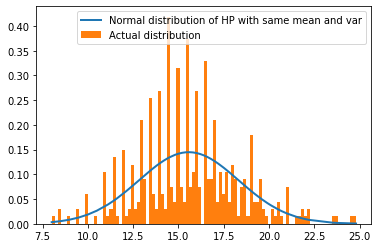

In [596]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(mpg_car_df['acc'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,linewidth = 2,label="Normal distribution of HP with same mean and var")
plt.hist(h,bins = 100,density=True,label="Actual distribution")      
plt.legend()
plt.show()

In [597]:
IQR_ACC = mpg_car_df["acc"].quantile(0.75) - mpg_car_df["acc"].quantile(0.25)

print('IQR_ACC -',IQR_ACC)

high_Wiskers_outlier = mpg_car_df["acc"].quantile(0.75) + 1.5*IQR_ACC
print('Higher outliers >',high_Wiskers_outlier)

low_Wiskers_outlier = mpg_car_df["acc"].quantile(0.25)  - 1.5*IQR_ACC
print('Lower outliers <',low_Wiskers_outlier)

IQR_ACC - 3.3499999999999996
Higher outliers > 22.2
Lower outliers < 8.8


Text(0.8, 8.8, 'Lower Outliers')

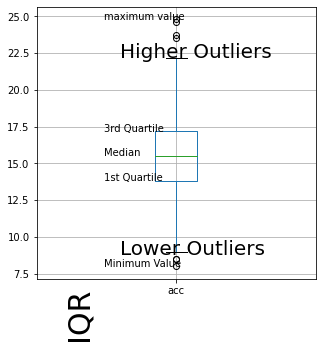

In [598]:
# Box Plot to show the outliers
mpg_car_df.boxplot(column="acc",return_type='axes',figsize=(5,5))
plt.text(x=0.74, y=17.175, s="3rd Quartile")
plt.text(x=0.74, y=15.5,  s="Median")
plt.text(x=0.74, y=13.825,  s="1st Quartile")
plt.text(x=0.74, y=8.0,  s="Minimum Value")
plt.text(x=0.74, y=24.8,  s="maximum value")
plt.text(x=0.80, y=22.199, s="Higher Outliers",size=20)
plt.text(x=0.60, y=3.349, s="IQR", rotation=90, size=30)
plt.text(x=0.80, y=8.8, s="Lower Outliers",size=20)

<font color=darkblue>

## Observations:
 - Acceleration looks to be multi modal and positively Skewed distribution.
 - Few Outliers which may affect the clustering process.

## Distribution of Car manufacturing Year

<AxesSubplot:xlabel='yr', ylabel='count'>

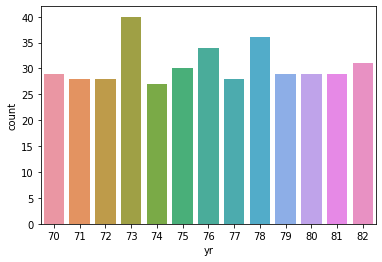

In [599]:
sns.countplot(x="yr", data=mpg_car_df)

<font color=darkblue>

## Observation:
   - Most of the cars in the Dataset belongs to 1973.
   - Second most manufacturing year is 1978.
   - Third most car manufacturing year is 1976.


## Distribution of Car manufacturing Place

<AxesSubplot:xlabel='origin', ylabel='count'>

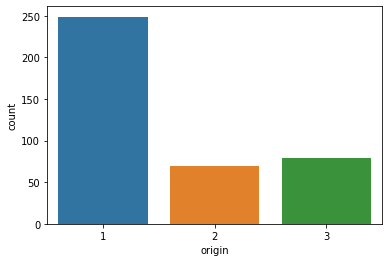

In [600]:
sns.countplot(x="origin", data=mpg_car_df)

## Observation:
   - Most of the cars in the Dataset are manufactured from Origin 1.
   - Second most manufacturer origin is Origin 2
   - Third most Manufacturer origin is Origin 3.
   - As this is a ordinal attribute, We can apply One Hot encoding or Label Encoder for further analysis.


### Bivariate Analysis

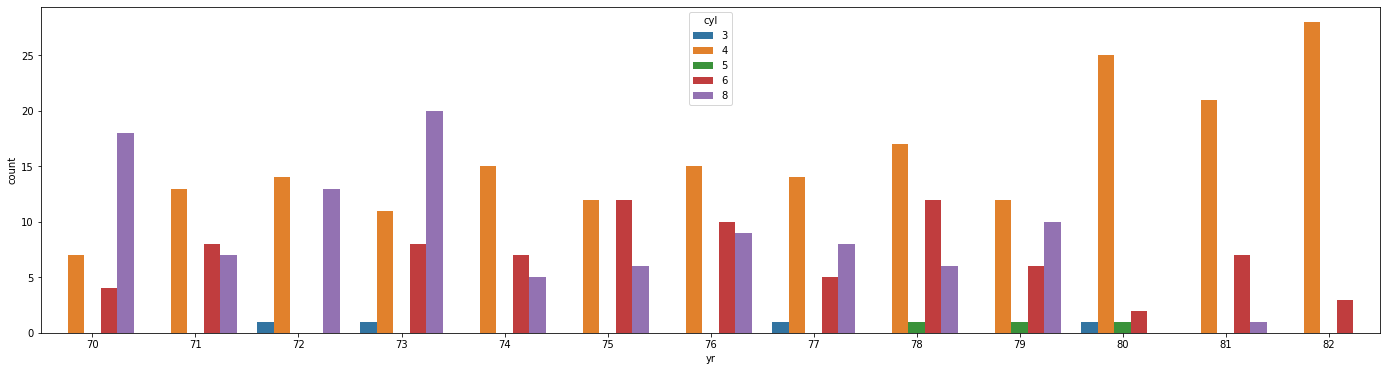

In [601]:
## Cylinder VS Year
plt.figure(figsize=(24,6))
ax = sns.countplot(mpg_car_df['yr'], hue = mpg_car_df['cyl'])

<font color=darkblue>

# Observations:
 - 8 Cylinder engine cars are in market from 1970, Which means people are craze in Sports cars in late 70's
 - 3 Cylinder engine and 5 Cylinder engines are less in number.
 - 4 Cylinder engine cars are common among the public from 1970's as people are interested in low end Sedan/Hatch pack cars.
 - From the Dataset it is obvious after 1979 the craze for Sports car has been drastically reduced.

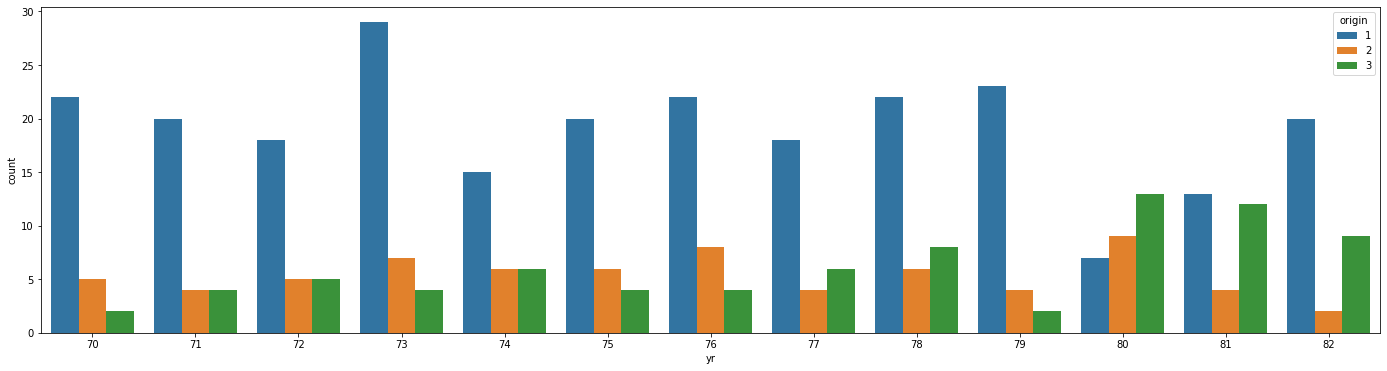

In [602]:
## Origin VS Year
plt.figure(figsize=(24,6))
ax = sns.countplot(mpg_car_df['yr'], hue = mpg_car_df['origin'])

<font color=darkblue>

# Observations:
 - From 1970 onwards Origin 1 is creating more cars.
 - Car production from origin 2 and origin 3 on 1971,1972 and 1974 are same.
 - 1980 is important to watch where Origin 3 has produced more cars than other regions. Origin 1 has lowest point of car production on 1980.
 - If we assume Origin -1 as America, Origin 2 as Europe and Origin 3 as Asia.
     - Due to Detriot economic recession on 1980, US car production is low.
     - From the Dataset its clear on 1980 Japan from Asia has started produce more number of cars than America.
     - In 1982 Europe hits low car production than ever.

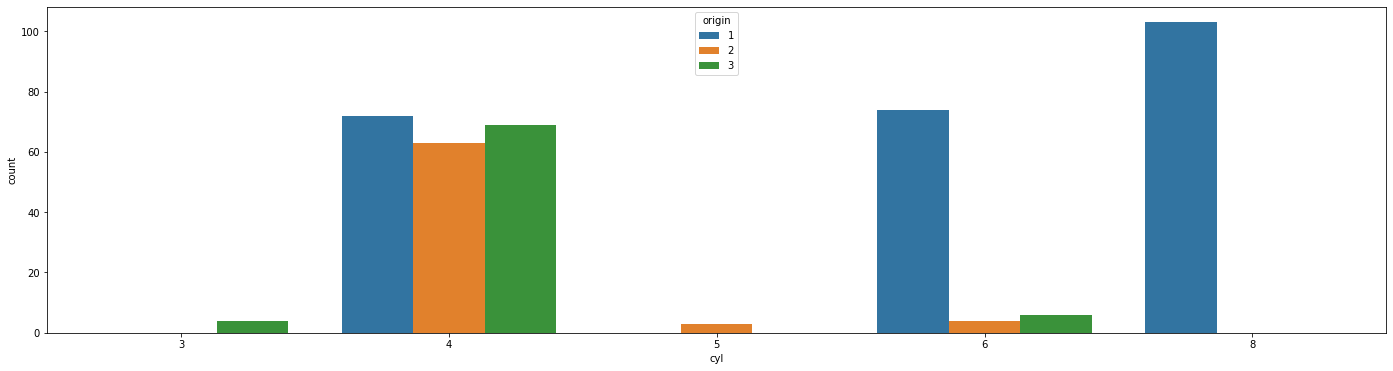

In [603]:
## Cylinder VS origin
plt.figure(figsize=(24,6))
ax = sns.countplot(mpg_car_df['cyl'], hue = mpg_car_df['origin'])

<font color=darkblue>

# Observations:
 - Most of the 8 and 6 cylinder engines that is sport cars are manufactured from America.
 - Europe has tried few cars with 5 cylinders.
 - People from Asia are interested in budgeted cars with 3 and 4 cylinders. Rarely Sports car with 6 cylinders are famous in Asia.

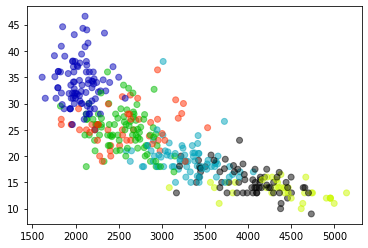

In [615]:
#Scatter plot on Weight and MPG

#px.scatter(mpg_car_df, x = 'wt', y = 'mpg')

plt.scatter(x = 'wt', y = 'mpg', data=mpg_car_df, c=colors, alpha=0.5)
plt.show()

<font color=darkblue>

# Observations:
 - From the above scatter plot mpg and Weight of the engines have weak correlation.
 - As the Weight of the engine increases, mpg decreases.

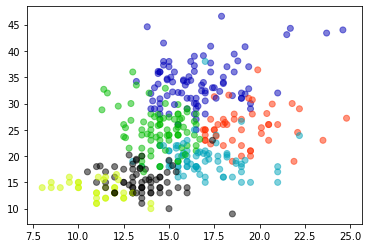

In [612]:
#Scatter plot on MPG and Acceleration

#px.scatter(mpg_car_df, x = 'acc', y = 'mpg')

plt.scatter(x = 'acc', y = 'mpg', data=mpg_car_df, c=colors, alpha=0.5)
plt.show()

<font color=darkblue>

# Observations:
 - Only few cars have the high acceleration and High MPG.

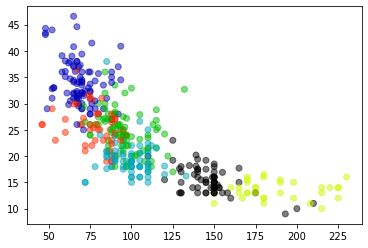

In [613]:
#Scatter plot on MPG and HP

#px.scatter(mpg_car_df, x = 'hp', y = 'mpg')

plt.scatter(x = 'hp', y = 'mpg', data=mpg_car_df, c=colors, alpha=0.5)
plt.show()

<font color=darkblue>

# Observations:
 - There is a week correlation between mpg and Hp.
 - HP increases and MPG decreases.

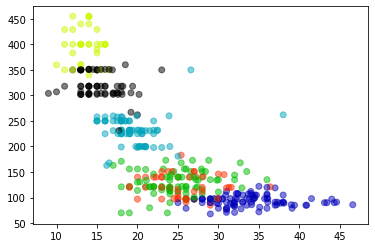

In [622]:
#Scatter plot on MPG and displacement

#px.scatter(mpg_car_df, x = 'mpg', y = 'disp')

plt.scatter(x = 'mpg', y = 'disp', data=mpg_car_df, c=colors, alpha=0.5)
plt.show()

<font color=darkblue>

# Observations:
 - There is a week correlation between mpg and Displacement.
 - MPG increases and Displacement decreases.

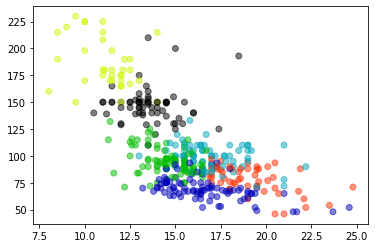

In [617]:
#Scatter plot on ACC and HP

#px.scatter(mpg_car_df, x = 'acc', y = 'hp')

plt.scatter(x = 'acc', y = 'hp', data=mpg_car_df, c=colors, alpha=0.5)
plt.show()

<font color=darkblue>

# Observations:
 - There is a week correlation between acceleration and HP.
 - Acceleration increases and HP decreases.

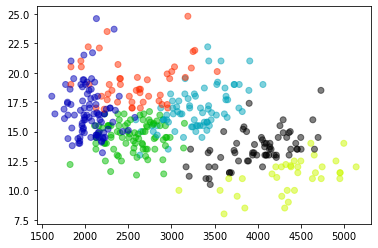

In [619]:
#Scatter plot on Weight and Acceleration

#px.scatter(mpg_car_df, x = 'wt', y = 'acc')

plt.scatter(x = 'wt', y = 'acc', data=mpg_car_df, c=colors, alpha=0.5)
plt.show()

<font color=darkblue>

# Observations:
 - From the above scatter plot Acceleration and Weight of the engines have weak correlation.
 - As the Weight of the engine increases, acceleration decreases.

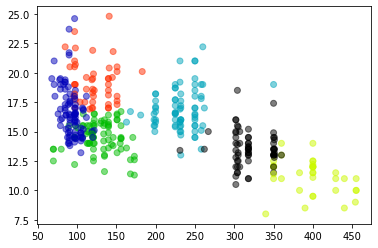

In [621]:
#Scatter plot on Weight and Acceleration

# px.scatter(mpg_car_df, x = 'disp', y = 'acc')

plt.scatter(x = 'disp', y = 'acc', data=mpg_car_df, c=colors, alpha=0.5)
plt.show()

<font color=darkblue>

# Observations:
 - From the above scatter plot Acceleration and Displacement of the engines has weak correlation.
 - As the Acceleration of the engine increases, Displacement decreases.

### Multi Variate Analysis

In [428]:
#creating a new column Displacement Per Cylinder.

mpg_car_df['dispercyl'] = mpg_car_df['disp'] / mpg_car_df['cyl']

In [429]:
## Adding One Hot Encoding GetDummies function as these are numerical ordinal values
## We are converting the Origin Column --> Origin -1 as America Origin- 2 as Europe and Origin-3 as Asia

In [430]:
# Replace the numbers in categorical variables with the actual country names in the origin col
mpg_car_df['origin'] = mpg_car_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})

In [431]:
mpg_car_dummies_df = pd.get_dummies(mpg_car_df, columns=['origin'])

In [432]:
mpg_car_dummies_df   ### We can use it latter if neccessary

,mpg,cyl,disp,hp,wt,acc,yr,dispercyl,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,38.375,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,43.750,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,39.750,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,38.000,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,37.750,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,35.000,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,24.250,0,0,1
395,32.0,4,135.0,84.0,2295,11.6,82,33.750,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,30.000,1,0,0


In [433]:
mpg_car_dummies_df.shape

(398, 11)

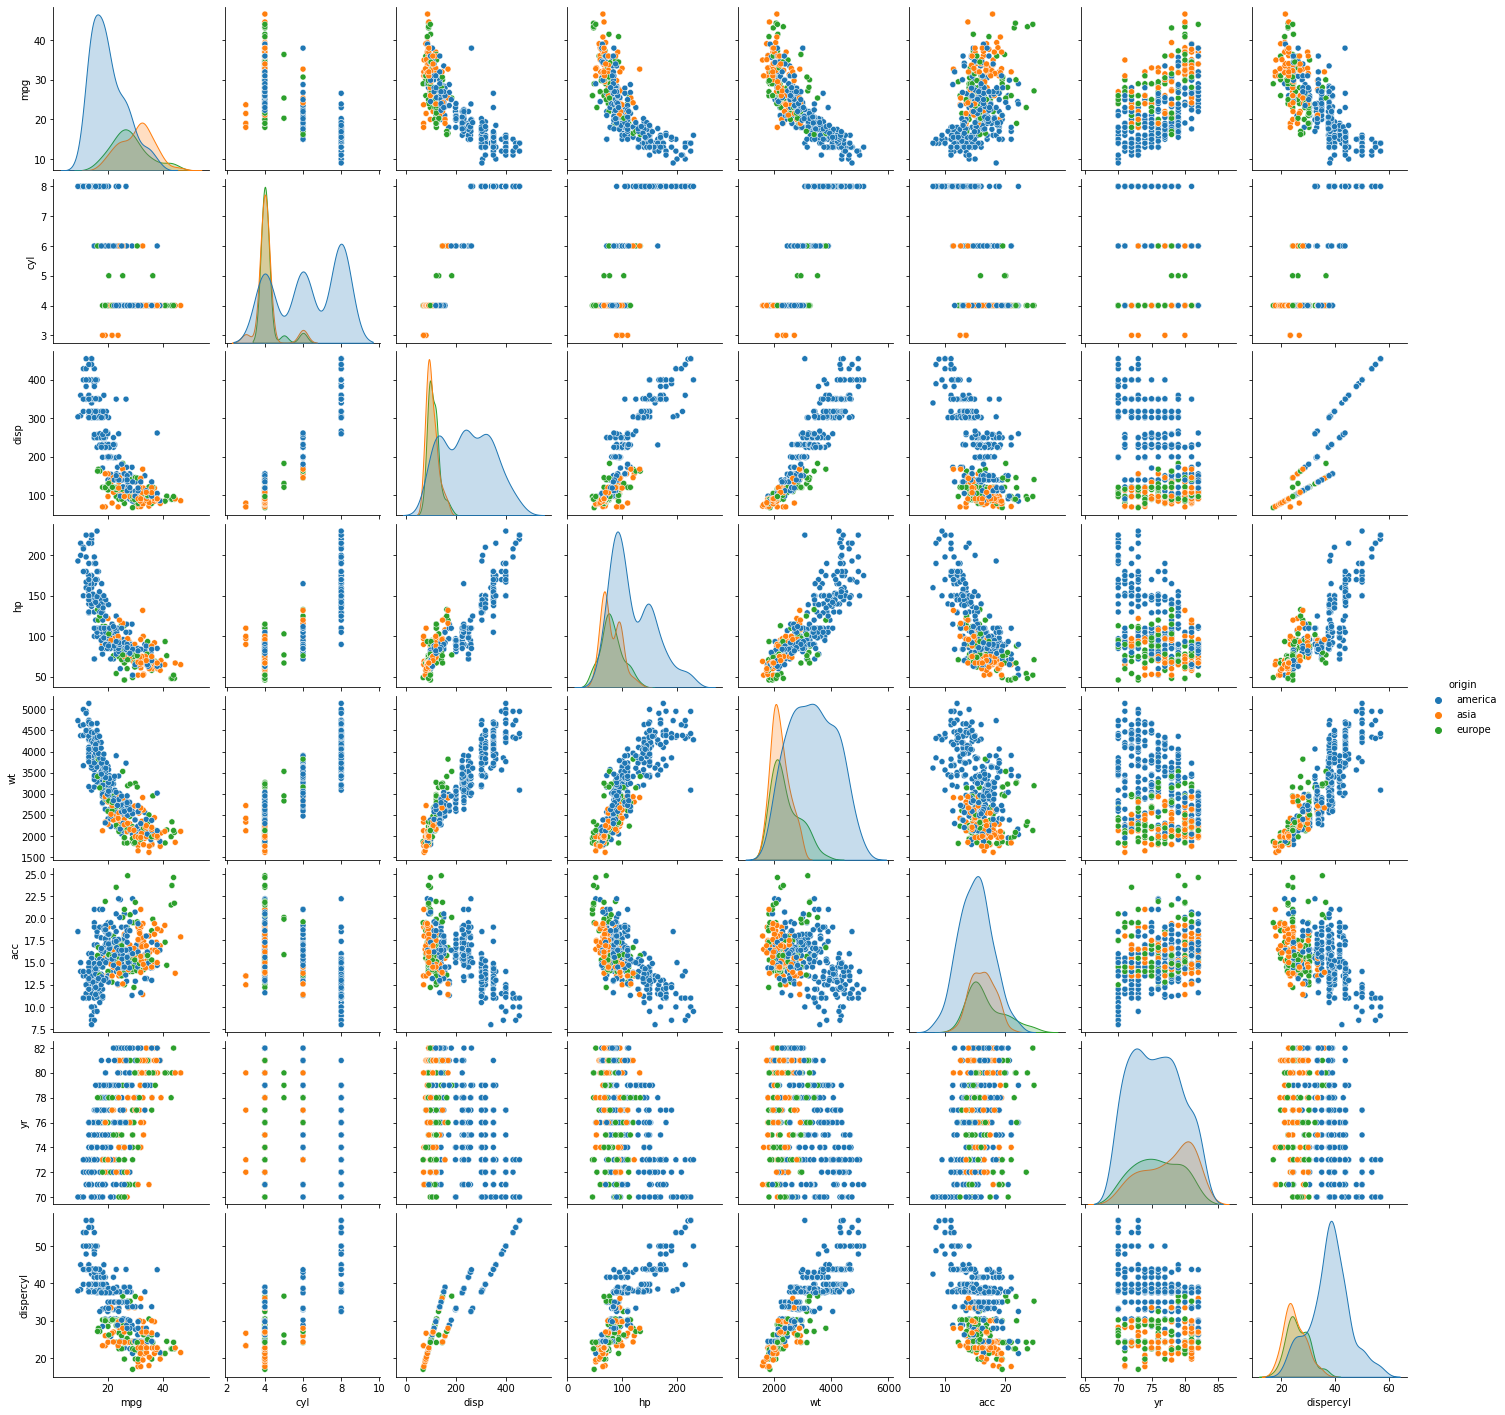

In [426]:
##Pairplot with repect to Origin

sns.pairplot(mpg_car_df, diag_kind='kde',hue='origin')

<AxesSubplot:>

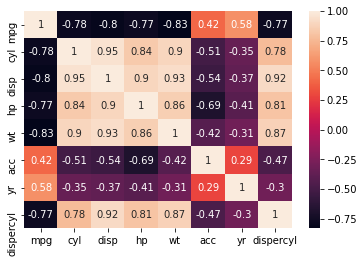

In [434]:
sns.heatmap(mpg_car_df.corr(),annot =True)

<font color=darkblue>

# Observations:
 - Created a new column Displacement per Cylinder, it has a good variation in distribution.
 - Origin is giving variation in the distribution for MPG,cylinder and Displacement.
 - Mostly American cars have engines with 8 cylinders.
 - Compare to other regions Asian cars are less in HP,weight and acceleration.
 - Most of the Asian cars are giving good MPG.
 - Seeing Strong positive correlation between displacement and Hp, Weight and Displacement, MPG and Acceleration, DisplacementPerCylinder and HP,DisplacementPerCylinder and weight,DisplacementPerCylinder and cylinder,DisplacementPerCylinder and displacement, Year of manufactur and mpg.
 - Seeing Week correlation between MPG and Displacement, MPG and HP,MPG and Weight,Displacement and Acceleration,HP and Acceleration, Weight and Acceleration,DisplacementPerCylinder and mpg,DisplacementPerCylinder and acceleration.

## Machine learning: [ Score: 8 points ]

In [435]:
#Treating Outliers and apply Zscore.

# Treating the Outliers for MPG,HP and ACC with the higher wiskers
mpg_car_df.loc[mpg_car_df['mpg'] > 46, 'mpg'] = 46

In [436]:
mpg_car_df.loc[mpg_car_df['acc'] > 21, 'acc'] = 21

In [437]:
mpg_car_df.loc[mpg_car_df['acc'] < 9, 'acc'] = 9

In [438]:
mpg_car_df.loc[mpg_car_df['hp'] > 198, 'hp'] = 198

<AxesSubplot:>

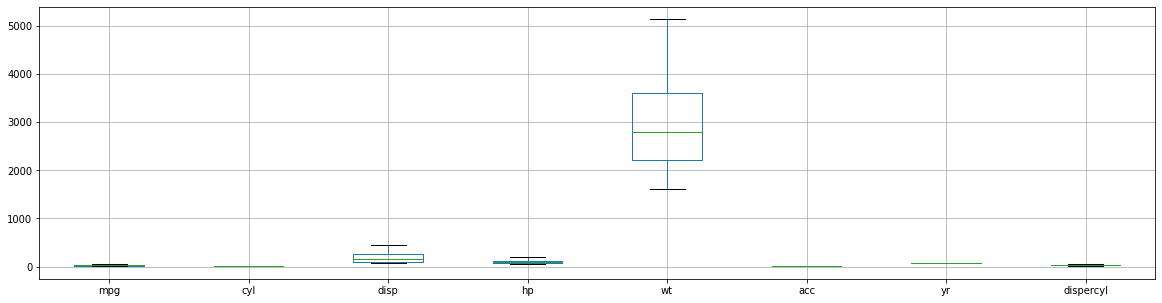

In [439]:
mpg_car_df.boxplot(figsize=(20,5))

## The below observation shows that the Outliers are cleared. Let us start construct the Clusters

In [440]:
mpg_car_df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,dispercyl
231,15.5,8,400.0,190.0,4325,12.2,77,america,50.00
375,36.0,4,105.0,74.0,1980,15.3,82,europe,26.25
197,29.0,4,90.0,70.0,1937,14.2,76,europe,22.50
116,16.0,8,400.0,198.0,4278,9.5,73,america,50.00
189,15.5,8,304.0,120.0,3962,13.9,76,america,38.00
74,13.0,8,302.0,140.0,4294,16.0,72,america,37.75
354,34.5,4,100.0,93.5,2320,15.8,81,europe,25.00
302,34.5,4,105.0,70.0,2150,14.9,79,america,26.25
156,16.0,8,400.0,170.0,4668,11.5,75,america,50.00
349,34.1,4,91.0,68.0,1985,16.0,81,asia,22.75


In [441]:
mpg_car_df.pop('origin')      # Remove "origin" and "yr" columns
mpg_car_df.pop('yr')

mpg_df_attr_z = mpg_car_df.apply(zscore)

mpg_df_attr_z.head(10)

,mpg,cyl,disp,hp,wt,acc,dispercyl
0,-0.706644,1.498191,1.090604,0.714760,0.630870,-1.344343,0.577426
1,-1.091173,1.498191,1.503514,1.668733,0.854333,-1.535010,1.196926
2,-0.706644,1.498191,1.196232,1.259888,0.550470,-1.725677,0.735902
3,-0.962997,1.498191,1.061796,1.259888,0.546923,-1.344343,0.534205
4,-0.834820,1.498191,1.042591,0.987324,0.565841,-1.916343,0.505391
5,-1.091173,1.498191,2.262118,2.568193,1.620492,-2.107010,2.335078
6,-1.219349,1.498191,2.502182,2.568193,1.635863,-2.488343,2.695252
7,-1.219349,1.498191,2.367746,2.568193,1.586204,-2.488343,2.493554
8,-1.219349,1.498191,2.511784,2.568193,1.719809,-2.107010,2.709659
9,-1.091173,1.498191,1.887617,2.350142,1.039961,-2.488343,1.773205


In [442]:
mpg_df_attr_v2_z =  mpg_df_attr_z.copy(deep = True) 

mpg_df_attr_v2_z

,mpg,cyl,disp,hp,wt,acc,dispercyl
0,-0.706644,1.498191,1.090604,0.714760,0.630870,-1.344343,0.577426
1,-1.091173,1.498191,1.503514,1.668733,0.854333,-1.535010,1.196926
2,-0.706644,1.498191,1.196232,1.259888,0.550470,-1.725677,0.735902
3,-0.962997,1.498191,1.061796,1.259888,0.546923,-1.344343,0.534205
4,-0.834820,1.498191,1.042591,0.987324,0.565841,-1.916343,0.505391
...,...,...,...,...,...,...,...
393,0.446942,-0.856321,-0.513026,-0.484520,-0.213324,0.028456,0.188437
394,2.625938,-0.856321,-0.925936,-1.411236,-0.993671,2.087656,-1.050564
395,1.087823,-0.856321,-0.561039,-0.539032,-0.798585,-1.496877,0.044367
396,0.575118,-0.856321,-0.705077,-0.675314,-0.408411,1.172456,-0.387842


In [443]:
array = mpg_df_attr_z.values

# Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data.

# KMeans Clustering

In [444]:
cluster_range = range( 2, 6)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(mpg_df_attr_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
  cluster_sil_scores.append(metrics.silhouette_score(mpg_df_attr_z, labels, metric='euclidean'))
 

# combine the cluster_range and cluster_errors into a dataframe by combining them

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors ,
                             "Avg Sil Score": cluster_sil_scores } )
clusters_df[0:15]

,num_clusters,cluster_errors,Avg Sil Score
0,2,1120.020992,0.497109
1,3,738.065395,0.401770
2,4,588.097975,0.359523
3,5,511.798014,0.330097


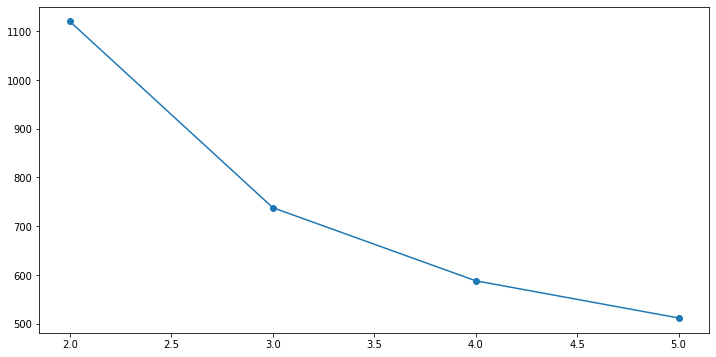

In [445]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

For n_clusters = 2 The average silhouette_score is : 0.49710936117066057


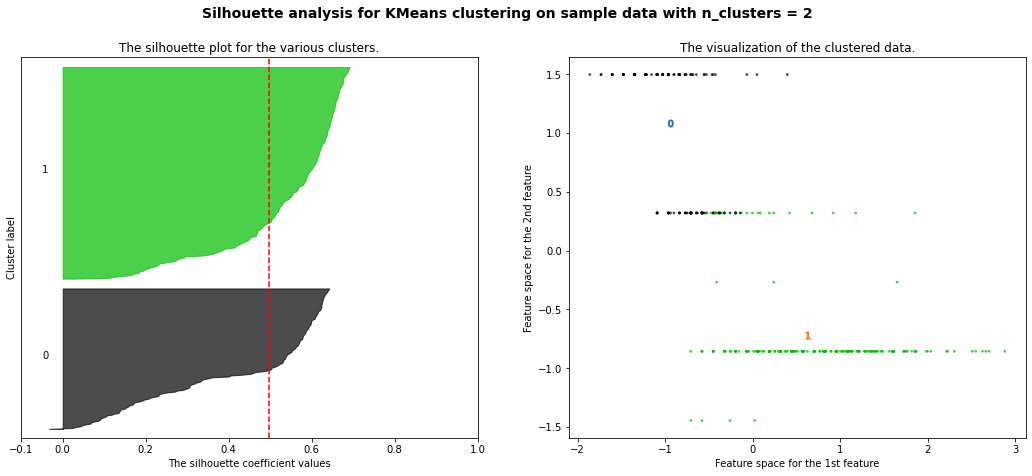

For n_clusters = 3 The average silhouette_score is : 0.4024464399075863


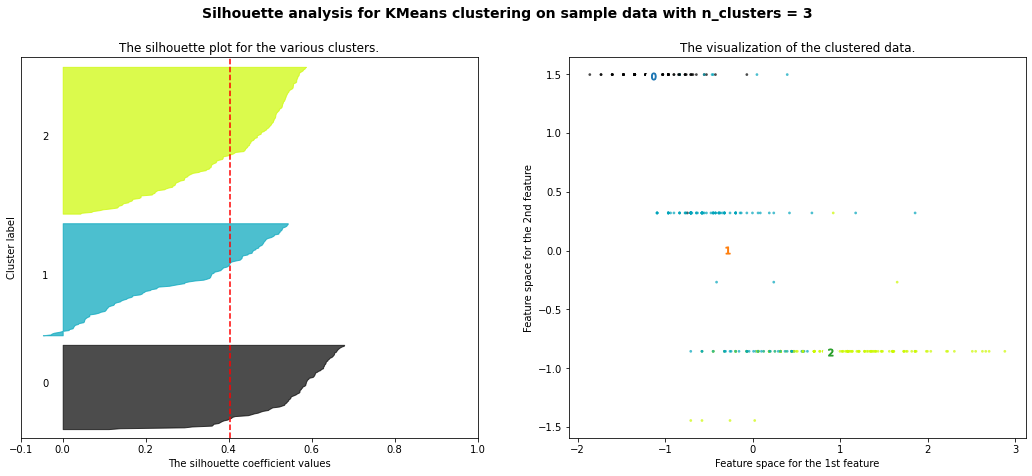

For n_clusters = 4 The average silhouette_score is : 0.359481922631223


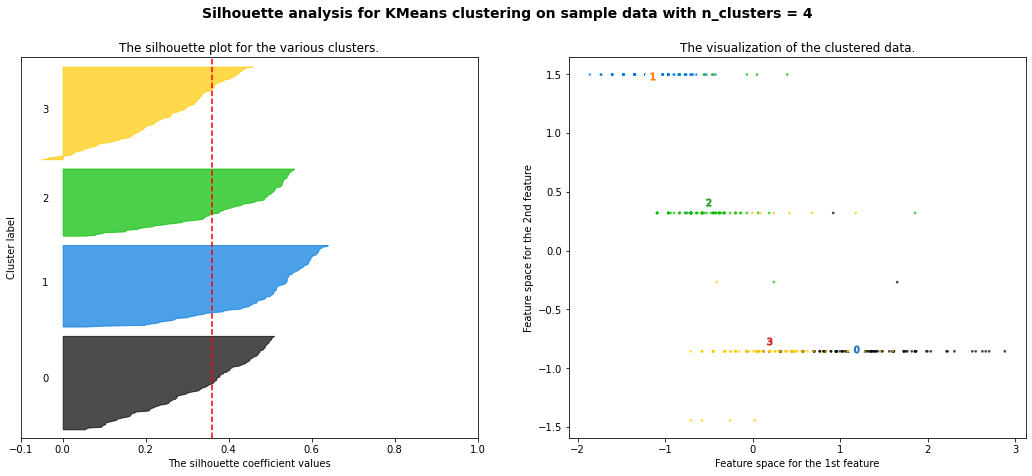

For n_clusters = 5 The average silhouette_score is : 0.32925079379141614


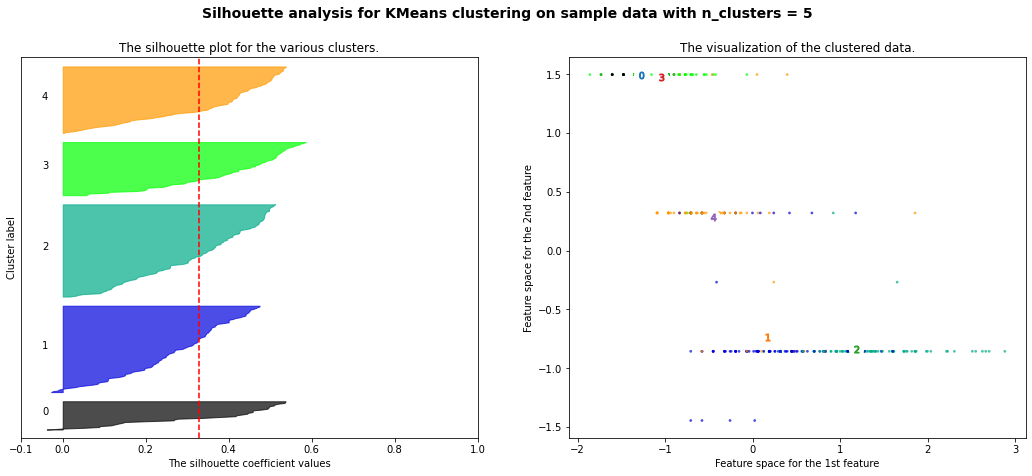

For n_clusters = 6 The average silhouette_score is : 0.32835395692148767


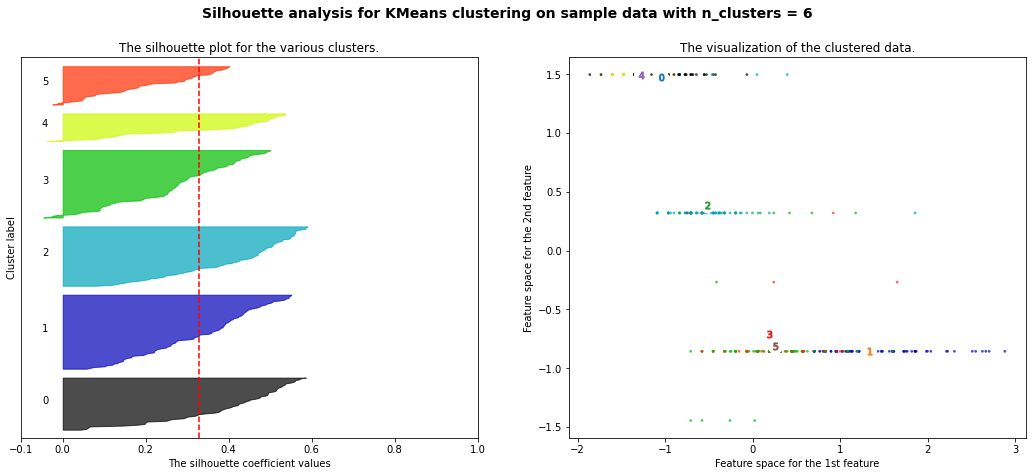

In [446]:
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(array) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(array)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(array, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(array, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(array[:, 0], array[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

<font color=darkblue>

# Observations:

 - The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
 - Silhoutte analysis reveals that the n_clusters =3 is a optimal level for clusters.

In [447]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(mpg_df_attr_z)

KMeans(n_clusters=3, random_state=2354)

In [448]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.88858145, -0.85980358, -0.8778952 , -0.75232538, -0.90949404,
         0.32156388, -0.90229377],
       [-1.14048141,  1.48617844,  1.4847011 ,  1.51298251,  1.38459032,
        -1.0735189 ,  1.18001976],
       [-0.29315333, -0.00258537,  0.0218594 , -0.16129234,  0.13751635,
         0.38824853,  0.28126497]])

In [449]:
centroid_df = pd.DataFrame(centroids, columns = list(mpg_df_attr_z) )
centroid_df

,mpg,cyl,disp,hp,wt,acc,dispercyl
0,0.888581,-0.859804,-0.877895,-0.752325,-0.909494,0.321564,-0.902294
1,-1.140481,1.486178,1.484701,1.512983,1.384590,-1.073519,1.180020
2,-0.293153,-0.002585,0.021859,-0.161292,0.137516,0.388249,0.281265


In [450]:
prediction=cluster.predict(mpg_df_attr_z)

mpg_df_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

In [451]:
mpg_df_attr_z.sample(10)

,mpg,cyl,disp,hp,wt,acc,dispercyl,GROUP
56,0.318766,-0.856321,-0.983552,-0.920621,-1.200582,1.896989,-1.223447,0
57,0.062413,-0.856321,-0.772295,-0.239212,-0.818684,-0.009677,-0.589540,0
394,2.625938,-0.856321,-0.925936,-1.411236,-0.993671,2.087656,-1.050564,0
10,-1.091173,1.498191,1.820399,1.805015,0.700628,-2.107010,1.672356,1
240,0.895559,-0.856321,-0.925936,-0.702570,-0.922731,-0.543544,-1.050564,0
81,0.575118,-0.856321,-0.925936,-0.320981,-0.806861,0.562323,-1.050564,0
389,-0.193939,0.320935,0.370411,0.224146,-0.160119,-0.314744,0.611042,2
232,-0.962997,1.498191,1.513117,1.232631,1.613398,-0.391010,1.211333,1
286,-0.757915,1.498191,1.042591,0.687504,0.892168,-0.810477,0.505391,1
259,-0.347751,0.320935,0.063128,-0.511776,0.117732,0.447923,-0.003656,2


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'dispercyl'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'hp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

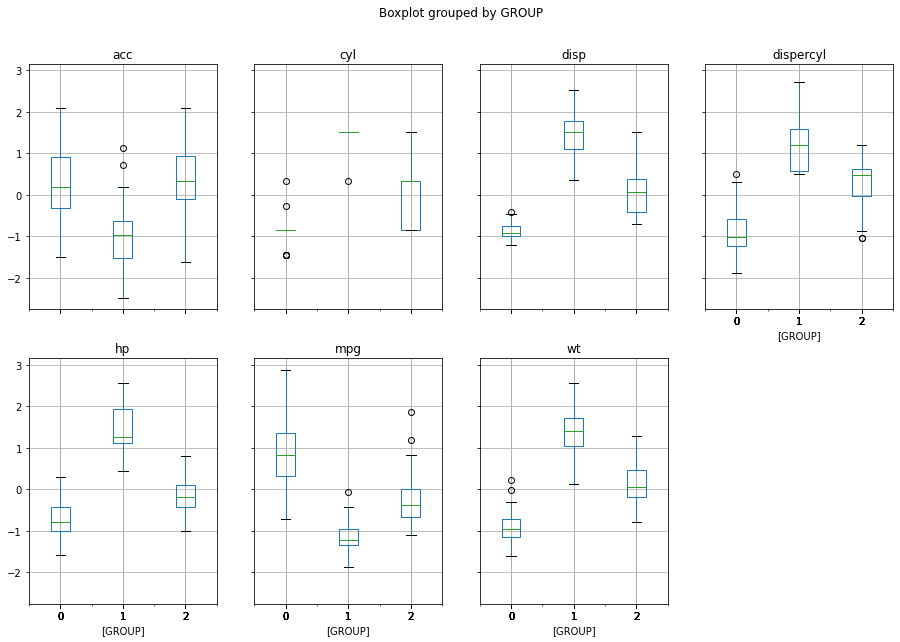

In [452]:
import matplotlib.pylab as plt

mpg_df_attr_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [453]:
mpg_df_attr_z.groupby(["GROUP"]).count()

,mpg,cyl,disp,hp,wt,acc,dispercyl
GROUP,,,,,,,
0,169,169,169,169,169,169,169
1,98,98,98,98,98,98,98
2,131,131,131,131,131,131,131


## Hierarchical clustering

In [454]:
from sklearn.cluster import AgglomerativeClustering

In [455]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [456]:
model.fit(array)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [457]:
mpg_df_attr_v2_z['labels'] = model.labels_

mpg_df_attr_v2_z.groupby(["labels"]).count()

,mpg,cyl,disp,hp,wt,acc,dispercyl
labels,,,,,,,
0,211,211,211,211,211,211,211
1,100,100,100,100,100,100,100
2,87,87,87,87,87,87,87


In [458]:
mpg_df_attr_v2_z.sample(10)

,mpg,cyl,disp,hp,wt,acc,dispercyl,labels
320,1.728705,-0.856321,-0.714680,-0.320981,-0.634239,-0.200344,-0.416656,0
278,1.023735,-0.856321,-1.002757,-0.893365,-1.159200,-0.238477,-1.281075,0
151,0.959647,-0.856321,-1.098783,-1.002390,-1.147376,0.180990,-1.569215,0
144,0.959647,-0.856321,-1.127590,-1.411236,-1.562379,0.371656,-1.655657,0
383,1.856881,-0.856321,-0.983552,-1.002390,-1.188758,-0.200344,-1.223447,0
239,0.831471,-0.856321,-0.925936,-1.002390,-1.165111,0.333523,-1.050564,0
217,0.831471,-0.856321,-0.791500,-0.648058,-0.964113,-0.276610,-0.647168,0
189,-1.027085,1.498191,1.061796,0.442197,1.172384,-0.619810,0.534205,1
298,-0.065763,1.498191,1.503514,0.578479,1.099078,0.714856,1.196926,2
29,0.446942,-0.856321,-0.925936,-0.430007,-0.993671,-0.391010,-1.050564,0


In [459]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [460]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [461]:
pdistance = pdist(mpg_df_attr_z)

Z = linkage(mpg_df_attr_z, 'average')
c, coph_dists = cophenet(Z , pdistance)

print(c)

0.814794357251643


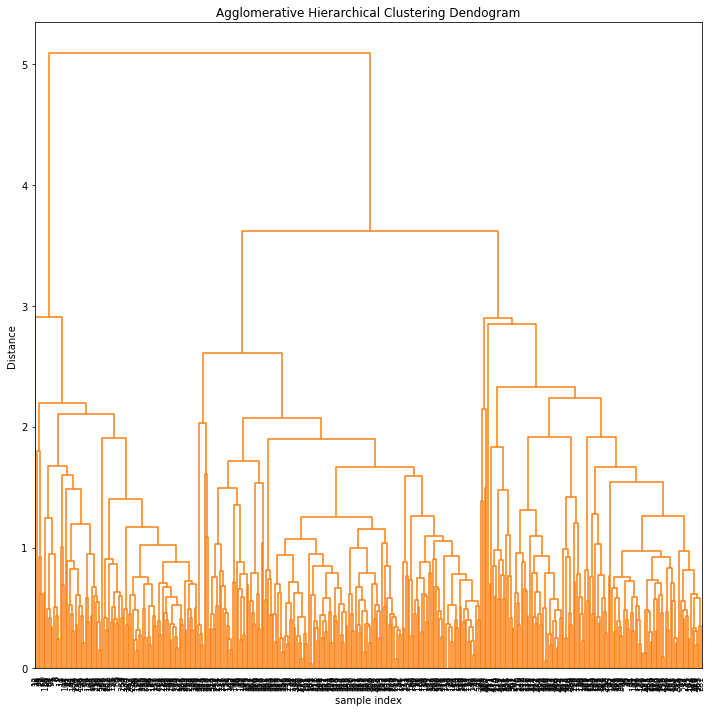

In [462]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 800, leaf_font_size=8. )
plt.tight_layout()

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'dispercyl'}, xlabel='[labels]'>],
       [<AxesSubplot:title={'center':'hp'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[labels]'>,
        <AxesSubplot:>]], dtype=object)

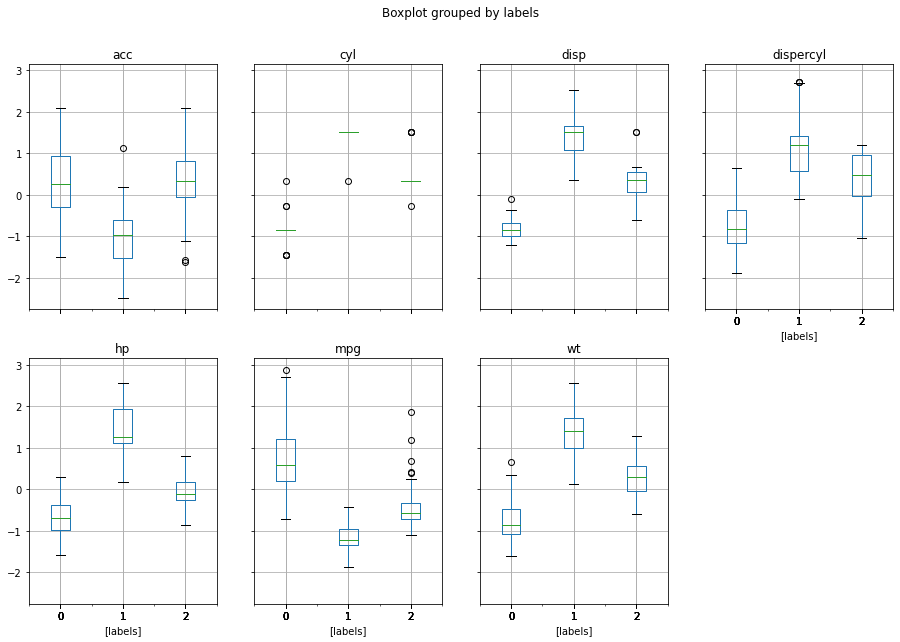

In [463]:
mpg_df_attr_v2_z.boxplot(by = 'labels',  layout=(2,4), figsize=(15, 10))

<font color=darkblue>
    
# Share your insights about the difference in using these two methods.
  - K Means Provides a way to identify the number of clusters using Elbow technique and Average Sil score methods.
  - From the Kmeans Clustering below are the 3 types of clusters formed.
      - Group 0 : This cluster has the cars with very low Engine weight,Very low HP,very low number of cylinders and have low displacement which have increased very high MPG and Acceleration.
   
      - Group 1: This cluster has the cars with very High Engine Weight,high HP, high number of cylinders with very high Displacement which have reduced the MPG and Acceleration.
      
      - Group 2: This cluster has the cars Medium Engine weight, produce medium HP with average number of cylinders and Medium Displacement which provides Average MPG and very good Acceleration.
   - From the above cluster groups we can name the car types as below.
         - Group 0 --> HatchBack/Low end Sedan Cars
         - Group 1 --> Sports Cars/XUV.
         - Group 2 --> High End Sedan
         
   - As per the Kmeans Clustering
   
|Cluster# | Type of Car |Total number of Cars in Cluster|
| --- | --- | --- |
| Group 0 | HatchBack/Low end Sedan Cars| 169 |
| Group 1 | Sports Cars/XUV | 98 |
| Group 2 | High End Sedan | 131 |

   - Agglomerative Heirarchical clustering with 3 number of clusters have produced the below results.
       - Group 0 : This cluster has the cars with very low Engine weight,Very low HP,very low number of cylinders and have low displacement which have increased very high MPG and Acceleration.
      - Group 1: This cluster has the cars with very High Engine Weight,high HP, high number of cylinders with very high Displacement which have reduced the MPG and Acceleration.
      - Group 2: This cluster has the cars Medium Engine weight, produce medium HP with average number of cylinders and Medium Displacement which provides Average MPG and have average Acceleration.
         - From the above cluster groups we can name the car types as below.
             - Group 0 --> HatchBack/Low end Sedan Cars
             - Group 1 --> Sports Cars/XUV
             - Group 2 --> High End Sedan
       - As per the Agglomerative Clustering, below are the number of cars in each clusters.
       
       
|Cluster# |Type of Car |Total number of Cars in Cluster|
| --- | --- | --- |
| Group 0 | HatchBack/Low end Sedan Cars | 211 |
| Group 1 | Sports Cars/XUV | 100 |
| Group 2 | High End Sedan | 87 |

## 5.Answer below questions based on outcomes of using ML based methods. 

 <font color=darkblue>

 # Mention how many optimal clusters are present in the data and what could be the possible reason behind it.
   -  From both Elbow and Average Sil score technique shows optimal clusters will be 3.
   -  The 3 possible clusters are of the below type. We can intrepret the below from the Boxplot plotted above from Kmeans and Agglomerative Clusterings.
       - Cluster which have the cars with very low Engine weight,Very low HP,very low number of cylinders and have low displacement which have increased very high MPG and Acceleration. This cluster represents HatchBack/Low end Sedan Cars.
       - Clusters which have the cars with very High Engine Weight,high HP, high number of cylinders with very high Displacement which have reduced the MPG and Acceleration. This cluster represents Sports Cars/XUV cars.
       - Clusters which have the cars Medium Engine weight, produce medium HP with average number of cylinders and Medium Displacement which provides Average MPG and have average Acceleration. This cluster represents High End Sedan.

# Use linear regression model on different clusters separately and print the coefficients of the models individually

In [473]:
mpg_df_K_Gr0 = mpg_df_attr_z[mpg_df_attr_z['GROUP'] == 0]
mpg_df_K_Gr1 = mpg_df_attr_z[mpg_df_attr_z['GROUP'] == 1]
mpg_df_K_Gr2 = mpg_df_attr_z[mpg_df_attr_z['GROUP'] == 2]

In [474]:
print(mpg_df_K_Gr0.shape)
print(mpg_df_K_Gr1.shape)
print(mpg_df_K_Gr2.shape)

(169, 8)
(98, 8)
(131, 8)


In [475]:
mpg_df_K_Gr0.head()

,mpg,cyl,disp,hp,wt,acc,dispercyl,GROUP
14,0.062413,-0.856321,-0.772295,-0.239212,-0.707544,-0.200344,-0.589540,0
18,0.446942,-0.856321,-0.925936,-0.430007,-0.993671,-0.391010,-1.050564,0
19,0.318766,-0.856321,-0.925936,-1.574774,-1.342463,1.896989,-1.050564,0
20,0.190590,-0.856321,-0.801103,-0.457263,-0.352841,0.752989,-0.675982,0
21,0.062413,-0.856321,-0.829911,-0.375494,-0.638968,-0.391010,-0.762424,0


## Linear Regression on Cluster 1 -Group 0 for the Clusters from Kmeans

In [476]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
XGR0 = mpg_df_K_Gr0.drop(columns={'mpg','GROUP'}, axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
YGR0 = mpg_df_K_Gr0[['mpg']]

In [477]:
# Split X and y into training and test set in 70:30 ratio

XGR0_train, XGR0_test, YGR0_train, YGR0_test = train_test_split(XGR0, YGR0, test_size=0.30, random_state=1)

In [478]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model_gr0 = LinearRegression()
regression_model_gr0.fit(XGR0_train, YGR0_train)

LinearRegression()

In [479]:
# Let us explore the coefficients for each of the independent attributes

for idx,colname in enumerate(XGR0_train.columns):
    print(" The coefficint for cluster - Group0 {} is {}".format(colname,regression_model_gr0.coef_[0][idx]))

 The coefficint for cluster - Group0 cyl is 9.33876925578088
 The coefficint for cluster - Group0 disp is -21.55205830820167
 The coefficint for cluster - Group0 hp is -1.2780655077505285
 The coefficint for cluster - Group0 wt is 0.0012492279578166787
 The coefficint for cluster - Group0 acc is -0.24653617446061205
 The coefficint for cluster - Group0 dispercyl is 7.178732824593354


In [480]:
# Let us check the intercept for the model

intercept = regression_model_gr0.intercept_[0]

print("The intercept for cluster - Group0 is {}".format(intercept))

The intercept for cluster - Group0 is -4.420200629076984


## Linear Regression on Cluster 2 -Group 1 for the Clusters from Kmeans

In [481]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
XGR1 = mpg_df_K_Gr1.drop(columns={'mpg','GROUP'}, axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
YGR1 = mpg_df_K_Gr1[['mpg']]

In [482]:
# Split X and y into training and test set in 70:30 ratio

XGR1_train, XGR1_test, YGR1_train, YGR1_test = train_test_split(XGR1, YGR1, test_size=0.30, random_state=1)

In [483]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model_gr1 = LinearRegression()
regression_model_gr1.fit(XGR1_train, YGR1_train)

LinearRegression()

In [484]:
# Let us explore the coefficients for each of the independent attributes

for idx,colname in enumerate(XGR1_train.columns):
    print(" The coefficint for cluster - Group1 {} is {}".format(colname,regression_model_gr1.coef_[0][idx]))

 The coefficint for cluster - Group1 cyl is -46483992602380.87
 The coefficint for cluster - Group1 disp is 74010952941910.4
 The coefficint for cluster - Group1 hp is -0.3125
 The coefficint for cluster - Group1 wt is -0.15234375
 The coefficint for cluster - Group1 acc is -0.08203125
 The coefficint for cluster - Group1 dispercyl is -49329932564432.95


In [485]:
# Let us check the intercept for the model

intercept = regression_model_gr1.intercept_[0]

print("The intercept for cluster - Group1 is {}".format(intercept))

The intercept for cluster - Group1 is 17409659408086.805


## Linear Regression on Cluster 3 -Group 2 for the Clusters from Kmeans

In [486]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
XGR2 = mpg_df_K_Gr2.drop(columns={'mpg','GROUP'}, axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
YGR2 = mpg_df_K_Gr2[['mpg']]

In [487]:
# Split X and y into training and test set in 70:30 ratio

XGR2_train, XGR2_test, YGR2_train, YGR2_test = train_test_split(XGR2, YGR2, test_size=0.30, random_state=1)

In [488]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model_gr2 = LinearRegression()
regression_model_gr2.fit(XGR2_train, YGR2_train)

LinearRegression()

In [489]:
# Let us explore the coefficients for each of the independent attributes

for idx,colname in enumerate(XGR2_train.columns):
    print(" The coefficint for cluster - Group2 {} is {}".format(colname,regression_model_gr2.coef_[0][idx]))

 The coefficint for cluster - Group2 cyl is 1.2939297556858256
 The coefficint for cluster - Group2 disp is -2.7580471822292543
 The coefficint for cluster - Group2 hp is -0.17814828768057356
 The coefficint for cluster - Group2 wt is -0.06136967265004167
 The coefficint for cluster - Group2 acc is -0.026107564678824746
 The coefficint for cluster - Group2 dispercyl is 1.230348648728182


In [490]:
# Let us check the intercept for the model

intercept = regression_model_gr2.intercept_[0]

print("The intercept for cluster - Group2 is {}".format(intercept))

The intercept for cluster - Group2 is -0.609272290877402


In [491]:
mpg_df_A_Gr0 = mpg_df_attr_v2_z[mpg_df_attr_v2_z['labels'] == 0]
mpg_df_A_Gr1 = mpg_df_attr_v2_z[mpg_df_attr_v2_z['labels'] == 1]
mpg_df_A_Gr2 = mpg_df_attr_v2_z[mpg_df_attr_v2_z['labels'] == 2]

In [492]:
print(mpg_df_A_Gr0.shape)
print(mpg_df_A_Gr1.shape)
print(mpg_df_A_Gr2.shape)

(211, 8)
(100, 8)
(87, 8)


## Linear Regression on Cluster 1 -Group 0 for the Clusters from Hierarchial Clusters

In [493]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
XGR_A_0 = mpg_df_A_Gr0.drop(columns={'mpg','labels'}, axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
YGR_A_0 = mpg_df_A_Gr0[['mpg']]

In [494]:
# Split X and y into training and test set in 70:30 ratio

XGR_A_train, XGR_A_test, YGR_A_train, YGR_A_test = train_test_split(XGR_A_0, YGR_A_0, test_size=0.30, random_state=1)

In [495]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model_A_gr0 = LinearRegression()
regression_model_A_gr0.fit(XGR_A_train, YGR_A_train)

LinearRegression()

In [496]:
# Let us explore the coefficients for each of the independent attributes

for idx,colname in enumerate(XGR_A_train.columns):
    print(" The coefficient for cluster - Group0 {} is {}".format(colname,regression_model_A_gr0.coef_[0][idx]))

 The coefficient for cluster - Group0 cyl is 3.27025055229125
 The coefficient for cluster - Group0 disp is -5.602738081987811
 The coefficient for cluster - Group0 hp is -1.015817180414017
 The coefficient for cluster - Group0 wt is -0.14049352015565286
 The coefficient for cluster - Group0 acc is -0.16370877660339245
 The coefficient for cluster - Group0 dispercyl is 1.7350692580130072


In [497]:
# Let us check the intercept for the model

intercept = regression_model_A_gr0.intercept_[0]

print("The intercept for cluster - Group0 is {}".format(intercept))

The intercept for cluster - Group0 is -0.5077884608877341


## Linear Regression on Cluster 2 -Group 1 for the Clusters from Hierarchial Clusters

In [498]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
XGR_A_1 = mpg_df_A_Gr1.drop(columns={'mpg','labels'}, axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
YGR_A_1 = mpg_df_A_Gr1[['mpg']]

In [499]:
# Split X and y into training and test set in 70:30 ratio

XGR1_A_train, XGR1_A_test, YGR1_A_train, YGR1_A_test = train_test_split(XGR_A_1, YGR_A_1, test_size=0.30, random_state=1)

In [500]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model_A_gr1 = LinearRegression()
regression_model_A_gr1.fit(XGR1_A_train, YGR1_A_train)

LinearRegression()

In [501]:
# Let us explore the coefficients for each of the independent attributes

for idx,colname in enumerate(XGR1_A_train.columns):
    print(" The coefficient for cluster - Group0 {} is {}".format(colname,regression_model_A_gr1.coef_[0][idx]))

 The coefficient for cluster - Group0 cyl is 11423882224534.033
 The coefficient for cluster - Group0 disp is -18188893905181.34
 The coefficient for cluster - Group0 hp is -0.25048828125
 The coefficient for cluster - Group0 wt is -0.1953125
 The coefficient for cluster - Group0 acc is -0.0478515625
 The coefficient for cluster - Group0 dispercyl is 12123298972632.656


In [502]:
# Let us check the intercept for the model

intercept = regression_model_A_gr1.intercept_[0]

print("The intercept for cluster - Group1 is {}".format(intercept))

The intercept for cluster - Group1 is -4278588983276.483


## Linear Regression on Cluster 3 -Group 2 for the Clusters from Hierarchial Clusters

In [503]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
XGR_A_2 = mpg_df_A_Gr2.drop(columns={'mpg','labels'}, axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
YGR_A_2 = mpg_df_A_Gr2[['mpg']]

In [504]:
# Split X and y into training and test set in 70:30 ratio

XGR2_A_train, XGR2_A_test, YGR2_A_train, YGR2_A_test = train_test_split(XGR_A_2, YGR_A_2, test_size=0.30, random_state=10)

In [505]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model_A_gr2 = LinearRegression()
regression_model_A_gr2.fit(XGR2_A_train, YGR2_A_train)

LinearRegression()

In [506]:
# Let us explore the coefficients for each of the independent attributes

for idx,colname in enumerate(XGR2_A_train.columns):
    print(" The coefficient for cluster - Group0 {} is {}".format(colname,regression_model_A_gr2.coef_[0][idx]))

 The coefficient for cluster - Group0 cyl is -0.24764870595809954
 The coefficient for cluster - Group0 disp is 1.421044588621946
 The coefficient for cluster - Group0 hp is 0.07996380327349867
 The coefficient for cluster - Group0 wt is -0.5705360108161514
 The coefficient for cluster - Group0 acc is -0.10245799388235777
 The coefficient for cluster - Group0 dispercyl is -0.7509245343942653


In [507]:
# Let us check the intercept for the model

intercept = regression_model_A_gr2.intercept_[0]

print("The intercept for cluster - Group1 is {}".format(intercept))

The intercept for cluster - Group1 is -0.2885900825074548


# How  using  different  models  for  different  clusters  will  be  helpful  in  this  case  and  how  it  will  be  different  than  using one single model without clustering? Mention how it impacts performance and prediction.

In [508]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df_attr_z.drop(columns={'mpg','GROUP'}, axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df_attr_z[['mpg']]


In [509]:
X.head(10)

,cyl,disp,hp,wt,acc,dispercyl
0,1.498191,1.090604,0.714760,0.630870,-1.344343,0.577426
1,1.498191,1.503514,1.668733,0.854333,-1.535010,1.196926
2,1.498191,1.196232,1.259888,0.550470,-1.725677,0.735902
3,1.498191,1.061796,1.259888,0.546923,-1.344343,0.534205
4,1.498191,1.042591,0.987324,0.565841,-1.916343,0.505391
5,1.498191,2.262118,2.568193,1.620492,-2.107010,2.335078
6,1.498191,2.502182,2.568193,1.635863,-2.488343,2.695252
7,1.498191,2.367746,2.568193,1.586204,-2.488343,2.493554
8,1.498191,2.511784,2.568193,1.719809,-2.107010,2.709659
9,1.498191,1.887617,2.350142,1.039961,-2.488343,1.773205


In [510]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [511]:
regressor = DecisionTreeRegressor(random_state=0 , max_depth=3)

regressor.fit(X_train , y_train)

rf_feature_imp = pd.DataFrame({'Features' : X.columns[0:6],
                              'Importance' : regressor.feature_importances_})

In [512]:
rf_feature_imp = rf_feature_imp.sort_values(by='Importance', ascending=False)
rf_feature_imp

,Features,Importance
0,cyl,0.742069
2,hp,0.195441
5,dispercyl,0.036474
3,wt,0.026016
1,disp,0.000000
4,acc,0.000000


In [513]:
print('Accuracy of One Single Model for training Set',regressor.score(X_train , y_train))
print('Accuracy of One Single Model for Testing Set',regressor.score(X_test , y_test))

Accuracy of One Single Model for training Set 0.7665158729958219
Accuracy of One Single Model for Testing Set 0.6819064629264149


In [514]:
## Decision Tree regressor on Cluster 1- Group 0 from Kmeans

regressor_GR0 = DecisionTreeRegressor(random_state=0 , max_depth=3)

regressor_GR0.fit(XGR0_train , YGR0_train)

GR0_feature_imp = pd.DataFrame({'Features' : XGR0.columns[0:6],
                              'Importance' : regressor_GR0.feature_importances_})

GR0_feature_imp = GR0_feature_imp.sort_values(by='Importance', ascending=False)


GR0_feature_imp

,Features,Importance
2,hp,0.582545
1,disp,0.170698
3,wt,0.103541
5,dispercyl,0.084248
4,acc,0.058967
0,cyl,0.000000


In [522]:
print('Accuracy of Cluster Model Group0 for Training set',regressor_GR0.score(XGR0_train , YGR0_train))
print('Accuracy of Cluster Model Group0 for Testing set',regressor_GR0.score(XGR0_test , YGR0_test)) 

Accuracy of Cluster Model Group0 for Training set 0.47549972772074545
Accuracy of Cluster Model Group0 for Testing set -0.1891549463151183


In [516]:
## Decision Tree regressor on Cluster 2- Group 1 from Kmeans

regressor_GR1 = DecisionTreeRegressor(random_state=3 , max_depth=3)

regressor_GR1.fit(XGR1_train , YGR1_train)

GR1_feature_imp = pd.DataFrame({'Features' : XGR1.columns[0:6],
                              'Importance' : regressor_GR1.feature_importances_})

GR1_feature_imp = GR1_feature_imp.sort_values(by='Importance', ascending=False)


GR1_feature_imp

,Features,Importance
3,wt,0.688973
2,hp,0.195661
5,dispercyl,0.115366
0,cyl,0.000000
1,disp,0.000000
4,acc,0.000000


In [521]:
print('Accuracy of Cluster Model Group1 for Training set',regressor_GR1.score(XGR1_train , YGR1_train))
print('Accuracy of Cluster Model Group1 for Testing set',regressor_GR1.score(XGR1_test , YGR1_test))

Accuracy of Cluster Model Group1 for Training set 0.6248305581806728
Accuracy of Cluster Model Group1 for Testing set 0.16608607489920102


In [518]:
## Decision Tree regressor on Cluster 3- Group 2 from Kmeans

regressor_GR2 = DecisionTreeRegressor(random_state=0 , max_depth=3)

regressor_GR2.fit(XGR2_train , YGR2_train)

GR2_feature_imp = pd.DataFrame({'Features' : XGR2.columns[0:6],
                              'Importance' : regressor_GR2.feature_importances_})

GR2_feature_imp = GR2_feature_imp.sort_values(by='Importance', ascending=False)


GR2_feature_imp

,Features,Importance
0,cyl,0.519913
5,dispercyl,0.340764
3,wt,0.139323
1,disp,0.000000
2,hp,0.000000
4,acc,0.000000


In [520]:
print('Accuracy of Cluster Model Group2 for Training set',regressor_GR2.score(XGR2_train , YGR2_train))
print('Accuracy of Cluster Model Group2 for Testing set',regressor_GR2.score(XGR2_test , YGR2_test))

Accuracy of Cluster Model Group2 for Training set 0.7556245208319465
Accuracy of Cluster Model Group2 for Testing set 0.2374678505636575


 <font color=darkblue>

# Observations:
   - From the one single model without clustering the total model accuracy is high.
      - Target variable MPG depends on Number of cylinders,HP,DisplacementPerCylinder,Weight of the engine, but it least bother about Displacement and acceleration. This doesn't gives the clear picture of what type of Car is given as the input.May be if the dataset is further feed with High end Sedan cars which has usually high displacement and high acceleration then the accuracy of the model will be underfit.
        
   - From the different models and different clusters, the model accuracy may be low. But see the below findings.
       - For the cluster 1,Group -0 model --> MPG depends on Weight of the engine, HP, Displacement, Displacementpercylinder and acceleration where as the number of cylinders is of least importance.
       - For the cluster 2,Group -1 model --> MPG depends on HP,Weight of the engine,displacementper cylinder and least important features are acceleration and displacement.
       - For the cluster 3,Group -2 model --> MPG depends on displacementpercylinder,Cylinder,weight of the engines and least important features are displacement,hp and acceleration.
       
   - If any new data was feed into the system, based on the above feature importance we can make the data to be treat with the respective model and we can make the model to perform better.

# Improvisation

 <font color=darkblue>

## Detailed  suggestions  or  improvements  or  on  quality,  quantity,  variety,  velocity,  veracity  etc.  on  the  data  points collected by the company  to perform a better data analysis in future.

 - <b>Quantity</b>:
      - The depth of the dataset is not sufficient. When we have separated the entire dataset as clusters and apply regression on each individual clusters the performance was reduced due to size of the dataset.
 - <b>Quality</b>:
      - Quality is moderate as we have worked on the missing values which we have replaced with mean/median value.
 - <b>Variety</b>:
      - Looks good, as we have worked and found some hidden patterns between each dimensions and produced new dimensions like displacement per cylinder etc.
 - <b>Veracity</b>:
      - The dataset has lot of noise/outliers which may affect clusterings, which we have treated with median.
 - <b>Velocity</b>:
      - As we have used a standalone .csv file, there is no point is discussing about data velocity, if we are connected with Live dataset we can discuss about Data Velocity.

 <font color=darkblue>

# DOMAIN: Manufacturing 

 - CONTEXT: Company X curates and packages wine across various vineyards spread throughout the country.

 - DATA DESCRIPTION: The data concerns the chemical composition of the wine and its respective quality.Attribute Information: 
     - A, B, C, D: specific chemical composition measure of the wine
     - Quality: quality of wine [ Low and High ]

 - PROJECT  OBJECTIVE: Goal  is  to  build  a  synthetic  data  generation  model  which  can  impute  values  wherever empty the company has missed recording the data. 

In [523]:
wine_df = pd.read_excel('C:\\Users\\Sasikumar Bala\\JupyterWorkspace\\UnsupervisedLearning\\Assignment\\Company.xlsx')
wine_df_copy =wine_df.copy(deep = True)

In [524]:
wine_df.shape

(61, 5)

In [525]:
wine_df.sample(10)

,A,B,C,D,Quality
12,27,106,57,37,Quality A
25,103,74,59,17,Quality A
29,29,49,6,35,NaN
34,183,142,164,186,Quality B
14,186,142,146,174,NaN
30,135,163,194,168,Quality B
31,142,159,176,150,Quality B
58,88,39,9,102,NaN
47,28,91,17,17,Quality A
54,70,96,70,103,Quality A


In [526]:
if(wine_df.isnull().sum().any() and wine_df.isna().sum().any()):
    print('The dataset contains null data points')
else:
    print('There are no null data points')

The dataset contains null data points


In [527]:
print(wine_df.isnull().sum())

A           0
B           0
C           0
D           0
Quality    18
dtype: int64


In [528]:
18/61
#You can see among the 61 rows, 18 rows have null values which contributes 0.29 percent of the dataset.

0.29508196721311475

 # Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data

In [529]:
# Code to get number of categories in missing value columns
print("Number of Categories in: ")

for ColName in wine_df[['Quality']]:
    print("{} = {}".format(ColName,len(wine_df[ColName].unique())))

Number of Categories in: 
Quality = 3


In [530]:
# Frequent Categorical Imputation this is a manual way on handling the missing categorical values

#1. Function to replace NAN values with mode value

def impute_nan_most_frequent_category(wine_df,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=wine_df[ColName].mode()[0]
    
    # replace nan values with most occured category
     wine_df[ColName + "_Imputed"] = wine_df[ColName]
     wine_df[ColName   + "_Imputed"].fillna(most_frequent_category,inplace=True)

In [531]:
#2. Call function to impute most occured category
impute_nan_most_frequent_category(wine_df,'Quality')

In [532]:
wine_df.head(10)

,A,B,C,D,Quality,Quality_Imputed
0,47,27,45,108,Quality A,Quality A
1,174,133,134,166,Quality B,Quality B
2,159,163,135,131,NaN,Quality A
3,61,23,3,44,Quality A,Quality A
4,59,60,9,68,Quality A,Quality A
5,153,140,154,199,NaN,Quality A
6,34,28,78,22,Quality A,Quality A
7,191,144,143,154,NaN,Quality A
8,160,181,194,178,Quality B,Quality B
9,145,178,158,141,NaN,Quality A


In [533]:
#3. Drop actual columns

wine_df = wine_df.drop(['Quality'], axis = 1)

wine_df.sample(10)

,A,B,C,D,Quality_Imputed
21,5,100,32,110,Quality A
35,181,147,174,130,Quality A
29,29,49,6,35,Quality A
9,145,178,158,141,Quality A
49,136,199,189,141,Quality B
30,135,163,194,168,Quality B
42,48,68,98,51,Quality A
52,188,178,175,162,Quality A
59,180,157,192,198,Quality A
0,47,27,45,108,Quality A


In [534]:
wine_df.Quality_Imputed.value_counts()

Quality A    44
Quality B    17
Name: Quality_Imputed, dtype: int64

In [535]:
## Trying to use KNN imputer as a Synthetic Way to impute Missing Categorical Values. 
# As you can see the above imputation caused a biased dataset with Quality A as more than Quality B

In [536]:
wine_df_copy.head(10)

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
5,153,140,154,199,NaN
6,34,28,78,22,Quality A
7,191,144,143,154,NaN
8,160,181,194,178,Quality B
9,145,178,158,141,NaN


In [537]:
wine_df_copy.Quality.value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

In [538]:
wine_df_copy['Quality_map'] =wine_df_copy.Quality.map({'Quality A' :1,'Quality B' : 2})

In [539]:
wine_df_copy.head(10)

,A,B,C,D,Quality,Quality_map
0,47,27,45,108,Quality A,1.0
1,174,133,134,166,Quality B,2.0
2,159,163,135,131,NaN,NaN
3,61,23,3,44,Quality A,1.0
4,59,60,9,68,Quality A,1.0
5,153,140,154,199,NaN,NaN
6,34,28,78,22,Quality A,1.0
7,191,144,143,154,NaN,NaN
8,160,181,194,178,Quality B,2.0
9,145,178,158,141,NaN,NaN


In [540]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors= 3)
wine_df_copy_filled = imputer.fit_transform(wine_df_copy[['A','B','C','D','Quality_map']])

In [541]:
imputed_wine_df = pd.DataFrame(data = wine_df_copy_filled, columns =['A','B','C','D','Quality_map'])

In [542]:
imputed_wine_df.head(10)

,A,B,C,D,Quality_map
0,47.0,27.0,45.0,108.0,1.0
1,174.0,133.0,134.0,166.0,2.0
2,159.0,163.0,135.0,131.0,2.0
3,61.0,23.0,3.0,44.0,1.0
4,59.0,60.0,9.0,68.0,1.0
5,153.0,140.0,154.0,199.0,2.0
6,34.0,28.0,78.0,22.0,1.0
7,191.0,144.0,143.0,154.0,2.0
8,160.0,181.0,194.0,178.0,2.0
9,145.0,178.0,158.0,141.0,2.0


In [543]:
imputed_wine_df['Quality_map'] = imputed_wine_df.Quality_map.map({1.0 :'Quality A', 2.0 : 'Quality B'})

In [544]:
imputed_wine_df.head(10)

,A,B,C,D,Quality_map
0,47.0,27.0,45.0,108.0,Quality A
1,174.0,133.0,134.0,166.0,Quality B
2,159.0,163.0,135.0,131.0,Quality B
3,61.0,23.0,3.0,44.0,Quality A
4,59.0,60.0,9.0,68.0,Quality A
5,153.0,140.0,154.0,199.0,Quality B
6,34.0,28.0,78.0,22.0,Quality A
7,191.0,144.0,143.0,154.0,Quality B
8,160.0,181.0,194.0,178.0,Quality B
9,145.0,178.0,158.0,141.0,Quality B


In [545]:
imputed_wine_df.Quality_map.value_counts()

Quality B    33
Quality A    28
Name: Quality_map, dtype: int64

In [546]:
# As you can see the above imputation has produced the Data set with equal number of Quality A and Quality B Wine's.

In [547]:
imputed_wine_df_upsampled = resample(imputed_wine_df, 
                                 replace=True,     # sample with replacement
                                 n_samples=1000,    # to match majority class
                                 random_state=123) # reproducible results

In [548]:
imputed_wine_df_upsampled.shape

(1000, 5)

array([[<AxesSubplot:title={'center':'A'}, xlabel='[Quality_map]'>,
        <AxesSubplot:title={'center':'B'}, xlabel='[Quality_map]'>,
        <AxesSubplot:title={'center':'C'}, xlabel='[Quality_map]'>,
        <AxesSubplot:title={'center':'D'}, xlabel='[Quality_map]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

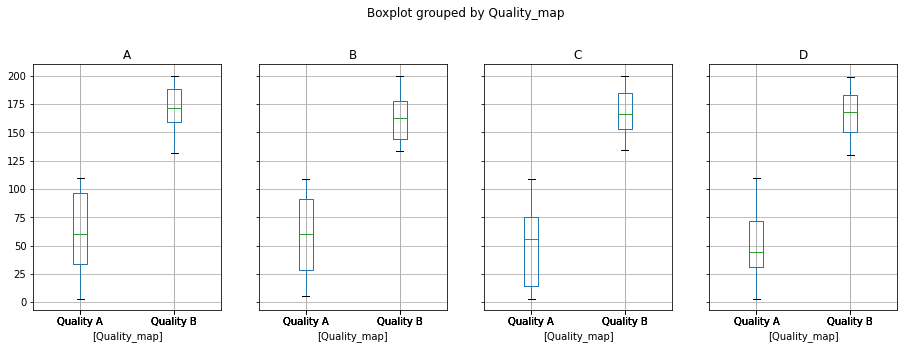

In [549]:
imputed_wine_df_upsampled.boxplot(by = 'Quality_map',  layout=(2,4), figsize=(15, 10))

 <font color=darkblue>

## Detailed  suggestions  or  improvements  or  on  collected  data  and  synthetic  data’s  quality,  quantity,  variety,  velocity, veracity etc. in order to perform a better data analysis in future.
                                                                                                                           
  - Dataset Company.xlsx doesn't have enough depth to predict the Quality of Wine. The dataset has only 61 rows with nearly 18 rows doesn't have the Quality as A or B (i.e Null as Quality), Which shows that the collected Dataset is poor.                                                                                                                         
                                                                                                                           
 - <b>Synthetic Data Quality</b>:
     - As the Synthetic Data set has been created using the upsampling technique with duplicate rows in it.So the Data Quality is poor and not real.
     
 - <b>Synthetic Data Quantity</b>:
      - Has created enough rows from the given data points of 61 to 1000 Samples.
 - <b>Synthetic Data Variety</b>:
      - Dataset has only 4 columns to decide the Target column Quality as low or High. So the Data Variety is Poor.
 - <b>Synthetic Data Veracity</b>:
      - From the above Boxplot we can see there are no noise and outliers as we have Imputed using KNN Imputer as the dataset is small in size.
 - <b>Synthetic Velocity</b>:
      - Not applicable as we are not dealing with live datasets.